the letters that I mainly used: [Kramers–Kronig constrained variational analysis of optical spectra](https://doi.org/10.1063/1.1979470), [Measurement of the optical dielectric function of monolayer transition-metal dichalcogenides](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.90.205422)


Using the Kramer-Kronig Constraint Variational Analysis, one can use more viable experimental methods to calculate complex dielectric function of thin film materials instead of directly measuring it. This method works since real and imaginary dielectric functions are coupled to each other via Kramer-Kronig relations.

$$\epsilon_1(ω) -1 = \frac{2}{\pi}P∫^{∞}_{0}\frac{xϵ_2(x)}{x^2 -ω^2}dx$$

$$\epsilon_2(ω)= -\frac{2ω}{\pi}P\int^∞_0\frac{ϵ_1(x)}{x^2 -ω^2}dx$$




# Library and others

In [ ]:
"""import os
from google.colab import drive
if not os.path.ismount('/content/drive') :
 drive.mount('/content/drive')
 # %cd /gdrive"""

"import os\nfrom google.colab import drive\nif not os.path.ismount('/content/drive') :\n drive.mount('/content/drive')\n # %cd /gdrive"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
%pip install lmfit
%pip install odfpy
import lmfit.models
from lmfit import Model
"""

'\n%pip install lmfit\n%pip install odfpy\nimport lmfit.models\nfrom lmfit import Model\n'

In [ ]:
import numpy as np
import math
import cmath


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import matplotlib
from operator import truediv
from scipy.signal import savgol_filter
from scipy import arange
from scipy.interpolate import interp1d
import scipy.constants as sc
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.special import wofz
import array as arr
from astropy.modeling.models import Voigt1D

from scipy.special import voigt_profile

# generate random integer values
from numpy.random import seed
from numpy.random import randint
from numpy.random import randn

from scipy.stats import norm
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as mpimg



## Parameters

In [ ]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

figsize = (6,5);

# Fonts
plt_label_size = 12; legend_font_size = plt_label_size*1 ;

# Line thicknesses
axes_linewidth = 3; lines_linewidth = axes_linewidth;

# Tick sizes
major_tick_size = 6; minor_tick_size = major_tick_size / 2; tick_width = major_tick_size / 4

kw_args = { 'figure.figsize' : figsize, # 'font.family' : 'cursive', # 'font.monospace' : 'Fixed',

            'axes.linewidth': axes_linewidth, 'lines.linewidth': lines_linewidth, 'axes.labelsize' : plt_label_size,

            'axes.grid' : True, 'grid.alpha' : 0.25, 'grid.color' : 'gray', 'grid.linestyle': '--',

            'legend.fontsize': legend_font_size, 'legend.title_fontsize' : legend_font_size,


            'xtick.direction':'in', 'xtick.major.size' : major_tick_size, 'xtick.major.width': tick_width, 'xtick.major.pad': major_tick_size,
            'xtick.minor.size' : minor_tick_size, 'xtick.minor.width': tick_width, 'xtick.labelsize': plt_label_size, 'xtick.minor.visible': True,
            'xtick.color' : 'k', 'xtick.top': True,

            'ytick.direction':'in', 'ytick.major.size' : major_tick_size, 'ytick.major.width': tick_width, 'ytick.major.pad': major_tick_size,
            'ytick.minor.size' : minor_tick_size, 'ytick.minor.width': tick_width, 'ytick.labelsize': plt_label_size, 'ytick.minor.visible': True,
            'ytick.color' : 'k', 'ytick.right': True,

           'savefig.bbox': "tight"

           }

plt.rcParams.update(kw_args)


t_1L_WS2 = 6.2 * pow(10, -10)            #thickness of monolayer WS2
t_1L_MoS2 = 6.1 * pow(10, -10)
hbar = 6.582 * pow(10, -16)             # hbar in units of eV.s

light_speed = sc.c                          #speed of ligth

t_1L_Graphene = 0.335 * pow(10, -10)



eps0 = 8.85e-12
mu0 = 4*sc.pi*1e-7
Z0 = 376.73
G0 = 7.748e-5
n_sio2 = 1.46
n_air = 1
theta_air = 0

input_path = '/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Reflection_Analysis/Inputs'
#input_path = "Inputs"
#input_path = r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Reflection_Analysis/Inputs'

output_folder_path = '/content/drive/MyDrive/Optics_of_2D_Materials/Python_Coding/Reflection_Analysis/Outputs'
#output_folder_path = "Outputs"
#output_folder_path = r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Reflection_Analysis/Outputs'


gamma = 0.002 #0.01
gamma_fine = 0.001

energy_delta = 0.002; energy_delta_fine = 0.001

bdata_energy_delta = 0.03

bstart_WS2= 40;
bstart_WS2_interpolated = 67

bstart_MoS2= 41; bstart_MoS2_interpolated = 67

energy_array = np.arange(1.65, 3, energy_delta) ; len_energy_array = len(energy_array)

omega = 2*cmath.pi*3e8/(1240./energy_array*1e-9)

energy_array_fine = np.arange(1.65, 2.99, energy_delta_fine) ; len_energy_array_fine = len(energy_array_fine)

material_name = '/ws2/'

inplane_real_text = 'Re[$\epsilon_{\parallel}$]'
inplane_imag_text = 'Im[$\epsilon_{\parallel}$]'
reflectance_contrast_text = '$\Delta$R/R'
energy_text = 'Energy (eV)'




## Import Data

In [ ]:
bdata_WS2 = pd.read_csv(input_path + material_name + 'bulk_multi_osc_fine.txt', names = [1, 2,3 ])

WS2_bulk_real = pd.read_csv(input_path + material_name + 'WS2_bulk_eps_real.csv', names = ['log(eV)', 'Real'])
WS2_bulk_real_array = np.array(WS2_bulk_real['Real']).astype(float)
WS2_bulk_real_log_energy_array = np.array(WS2_bulk_real['log(eV)']).astype(float)

WS2_bulk_imag= pd.read_csv(input_path + material_name + 'WS2_bulk_eps_imag.csv', names = ['log(eV)', 'Imag'])
WS2_bulk_imag_array = np.array(WS2_bulk_imag['Imag']).astype(float)
WS2_bulk_imag_log_energy_array = np.array(WS2_bulk_imag['log(eV)']).astype(float)

len_bdata_WS2 = len(bdata_WS2)


refl_WS2_1L_PETG= pd.read_csv( input_path + material_name +'WS2_1L_3_data', names = ['eV', 'reflectance contrast'], delimiter = ',')

refl_WS2_2L_PETG= pd.read_csv( input_path + material_name +'WS2_2L_2_data', names = ['eV', 'reflectance contrast'], delimiter = ',')


refl_WS2_2023_09_05_2L_PDMS = pd.read_csv( input_path + material_name +'WS2_2L_2023-09-05.csv', delimiter = ',')
refl_WS2_2023_09_05_2L_PDMS.sort_values(by = 'energy', inplace = True, ignore_index = True)

refractive_data = pd.read_csv(input_path + '/All_refractive_indices_range1.csv', delimiter = ';').drop(labels=[0, 1], axis=0)
refractive_data.reset_index(inplace = True, drop = True)

quartz_n = np.array(refractive_data['n.4']).astype(float)
quartz_n_energy = np.array(refractive_data['Energy']).astype(float)


PETG_data = (pd.read_csv(input_path + '/n_PETG.csv').drop(labels=[0, 1], axis=0))
PETG_data.reset_index(inplace = True, drop = True)

PETG_n = np.array(PETG_data['n']).astype(float)
PETG_energy = np.array(PETG_data['Energy']).astype(float)

PDMS_data = pd.read_csv(input_path + '/n_pdms.csv', names = ['Energy', 'n'])#.drop(labels=[0, 1], axis=0))
PDMS_n = np.array(PDMS_data['n']).astype(float)
PDMS_energy = np.array(PDMS_data['Energy']).astype(float)



In [ ]:

refl_WS2_2023_09_05_2L_PDMS

energy      11_1      11_2      14_1      14_2      14_3
0     1.329633  0.928412  0.910870  0.877591  0.861201  0.853109
1     1.330057  0.956436  0.946682  0.858826  0.856587  0.845287
2     1.330481  0.939925  0.918121  0.842481  0.854831  0.850036
3     1.330906  0.915825  0.911615  0.869680  0.868881  0.870201
4     1.331330  0.951188  0.933162  0.881925  0.885684  0.866643
...        ...       ...       ...       ...       ...       ...
1995  3.746743  0.256211  0.563665  0.642970  0.552923  0.556082
1996  3.750195  1.019881  0.998012  0.611594  0.482609  0.353623
1997  3.753654  0.772222  0.668519  0.791016  0.861328  1.044922
1998  3.757119  0.615538  0.750996  0.653710  0.681979  0.553004
1999  3.760591  0.618153  0.439750  0.566069  0.499184  0.644372

[2000 rows x 6 columns]

In [ ]:
MoS2_2L_suspended_data = pd.read_csv(input_path + '/mos2/MoS2_2L_suspended_quartz.csv')
MoS2_2L_suspended_data.sort_values( ['Energy'], inplace  = True)

MoS2_2L_suspended_refl_cont = np.array(MoS2_2L_suspended_data['ReflectanceContrast']).astype(float)
MoS2_2L_suspended_energy = np.array(MoS2_2L_suspended_data['Energy']).astype(float)

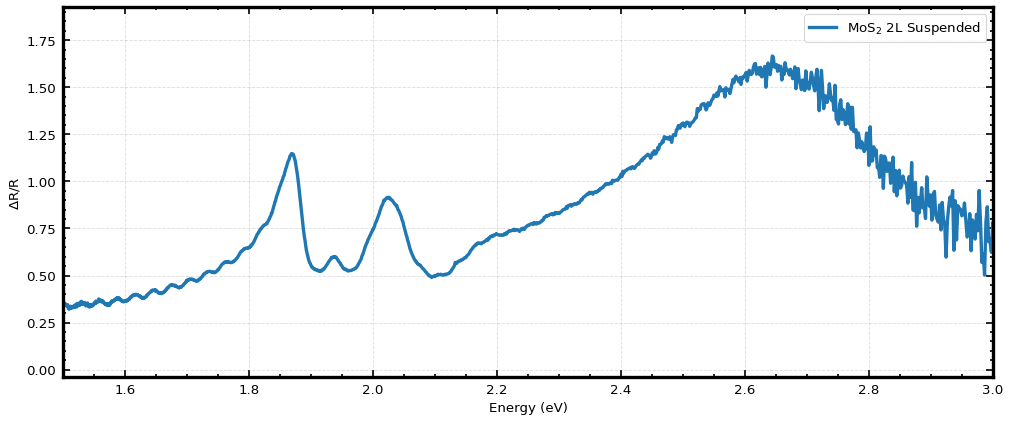

In [ ]:

figure(figsize=(15, 6), dpi=80)
plt.plot(MoS2_2L_suspended_energy, MoS2_2L_suspended_refl_cont, label ='MoS$_2$ 2L Suspended' )
plt.xlabel('Energy (eV)'); plt.ylabel(reflectance_contrast_text)
plt.legend()
plt.xlim(1.5,3)
plt.show()

In [ ]:
bdata_MoS2 = pd.read_csv(input_path + '/mos2/' + 'bulk_multi_osc_fine.txt', names = [1, 2,3 ])

MoS2_bulk_real = pd.read_csv(input_path + '/mos2/'+ 'mos2_bulk_eps_real.txt', names = ['log(eV)', 'Real'])
MoS2_bulk_real_array = np.array(MoS2_bulk_real['Real']).astype(float)
MoS2_bulk_real_log_energy_array = np.array(MoS2_bulk_real['log(eV)']).astype(float)

MoS2_bulk_imag= pd.read_csv(input_path + '/mos2/' + 'mos2_bulk_eps_imag.txt', names = ['log(eV)', 'Imag'])
MoS2_bulk_imag_array = np.array(MoS2_bulk_imag['Imag']).astype(float)
MoS2_bulk_imag_log_energy_array = np.array(MoS2_bulk_imag['log(eV)']).astype(float)

len_bdata_MoS2 = len(bdata_MoS2)


refl_MoS2_2L= pd.read_csv( input_path + '/mos2/' +'mos2_2L.txt', names = ['eV', 'reflectance contrast'], delimiter = ',')

refl_MoS2_3L= pd.read_csv( input_path + '/mos2/' +'mos2_3L.txt', names = ['eV', 'reflectance contrast'], delimiter = ',')

refl_MoS2_4L= pd.read_csv( input_path + '/mos2/' +'mos2_4L.txt', names = ['eV', 'reflectance contrast'], delimiter = ',')

refl_MoS2_5L= pd.read_csv( input_path + '/mos2/' +'mos2_5L.txt', names = ['eV', 'reflectance contrast'], delimiter = ',')


## Functions

In [ ]:
def propM_TE(n, d, wavelength, theta):

 eps0 = 8.85e-12
 mu0 = 4*np.pi*1e-7
 h = n*d/np.cos(theta)
 Y = np.sqrt(eps0/mu0)*n*np.cos(theta)

 k = 2*np.pi/wavelength
 M11 = (np.exp(-1j*k*h)+ np.exp(1j*(k*h)))/2;
 M12 = 1j*(1/Y)*((-np.exp(-1j*k*h) + np.exp(1j*(k*h)))/(2j));
 M21 = 1j*(Y)*((-np.exp(-1j*k*h) + np.exp(1j*(k*h)))/(2j));
 M22 = (np.exp(-1j*k*h) + np.exp(1j*(k*h)))/2;

 M = [[M11, M12], [M21, M22]]

 return M

In [ ]:
def fit_from_bulk_part(energy_array, bstart, bdata):
  sb = len(bdata)
  sx = len(energy_array)

  eps1 = np.ones(sx)
  eps2 = np.zeros(sx)

  bdata = bdata.iloc[bstart:sb].reset_index()
  bdata_energy_array = np.array(bdata[1])
  bdata_gamma = np.array(bdata[2])
  bdata_f = np.array(bdata[3])

  common = (2 * bdata_f[:, np.newaxis] * bdata_energy_array[:, np.newaxis] *bdata_gamma[:, np.newaxis])/(np.pi*((bdata_energy_array[:, np.newaxis]**2 - energy_array**2)**2 + (bdata_gamma[:, np.newaxis] * energy_array)**2))

  eps1_i = common * (bdata_energy_array[:, np.newaxis] ** 2 - energy_array**2)

  eps2_i = common * bdata_gamma[:, np.newaxis] * energy_array

  eps1 =  np.sum(eps1_i, axis=0)
  eps2 =  np.sum(eps2_i, axis=0)


  return eps1, eps2


In [ ]:
def fit_mult_osc( energy_array, *x, n_substrate, gamma, eps1_from_bulk, eps2_from_bulk, t , eps0 = eps0, mu0= mu0, n_air = n_air,
    theta_air = theta_air):

    theta_substrate = np.arcsin((n_air * np.sin(theta_air)) / n_substrate.real)  # theta_sio2 is the refraction angle in the glass

    Y_air = np.sqrt(eps0 / mu0) * n_air * np.cos(theta_air)

    Y_substrate = np.sqrt(eps0 / mu0) * n_substrate * np.cos(theta_substrate)

    sx = len(energy_array)

    temp_eps2 =  np.array(x[0:sx])

    eps1, eps2 = dielectric_functions(energy_array, temp_eps2 , gamma, eps1_from_bulk, eps2_from_bulk )

    refl_fit = np.zeros(sx)

    n = np.sqrt(eps1 - 1j*eps2);

    wavelength = 1240 / energy_array * 1e-9

    M = propM_TE(n, t, wavelength, 0)

    re = (Y_air * M[0][0] + Y_air * Y_substrate * M[0][1] - M[1][0] - Y_substrate* M[1][1]) / (Y_air * M[0][0] + Y_air * Y_substrate * M[0][1] + M[1][0] + Y_substrate * M[1][1])

    refl_fit = abs(re)**2


    return refl_fit

In [ ]:
def dielectric_functions(energy_array, fit_array, gamma, eps1_from_bulk, eps2_from_bulk ):

    sx = len(energy_array)

    eps2_init = fit_array

    eps1 = np.ones(sx)
    eps2 = np.zeros(sx)

    denominator = (2/np.pi)*(gamma*energy_array[:, np.newaxis] * eps2_init[:, np.newaxis])/((energy_array[:, np.newaxis] ** 2 - energy_array ** 2) ** 2 + (gamma * energy_array) ** 2)

    eps1_i =  (energy_array[:, np.newaxis]**2 - energy_array ** 2) *denominator

    eps2_i =  gamma*energy_array*denominator

    eps1 = eps1 + np.sum(eps1_i, axis =0) + eps1_from_bulk
    eps2 = np.sum(eps2_i, axis =0) + eps2_from_bulk


    return eps1, eps2

In [ ]:
def log_to_energy(log_energy):
  return math.exp(log_energy/30*math.log(30))



# Interpolations

In [ ]:
PETG_n_interpolator = interp1d(PETG_energy, PETG_n, kind = 1)
PETG_n_interpolated_array = PETG_n_interpolator(energy_array)

PETG_n_interpolator_fine = interp1d(PETG_energy, PETG_n, kind = 1)
PETG_n_interpolated_array_fine = PETG_n_interpolator_fine(energy_array_fine)


quartz_n_interpolator = interp1d(quartz_n_energy, quartz_n, kind = 1)
quartz_n_interpolated_array = quartz_n_interpolator(energy_array)

quartz_n_interpolator_fine = interp1d(quartz_n_energy, quartz_n, kind = 1)
quartz_n_interpolated_array_fine = quartz_n_interpolator_fine(energy_array_fine)

PDMS_n_interpolator = interp1d(PDMS_energy, PDMS_n, kind = 1)
PDMS_n_interpolated_array = PDMS_n_interpolator(energy_array)

PDMS_n_interpolator_fine = interp1d(PDMS_energy, PDMS_n, kind = 1)
PDMS_n_interpolated_array_fine = PDMS_n_interpolator_fine(energy_array_fine)


In [ ]:
PETG_reflectance_array = (PETG_n_interpolated_array - 1)**2/(PETG_n_interpolated_array + 1)**2
PDMS_reflectance_array = (PDMS_n_interpolated_array - 1)**2/(PDMS_n_interpolated_array + 1)**2

quartz_reflectance_array = (quartz_n_interpolated_array - 1)**2/(quartz_n_interpolated_array + 1)**2

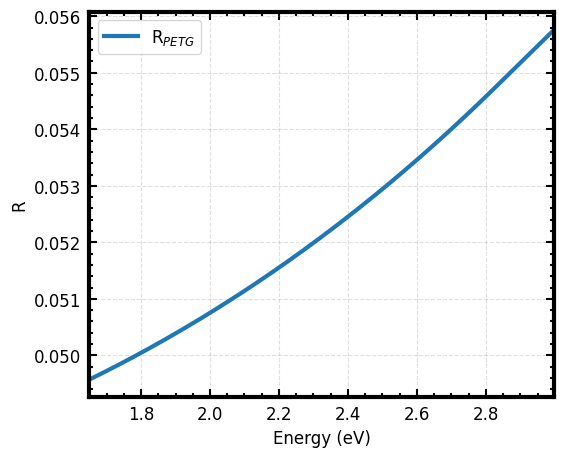

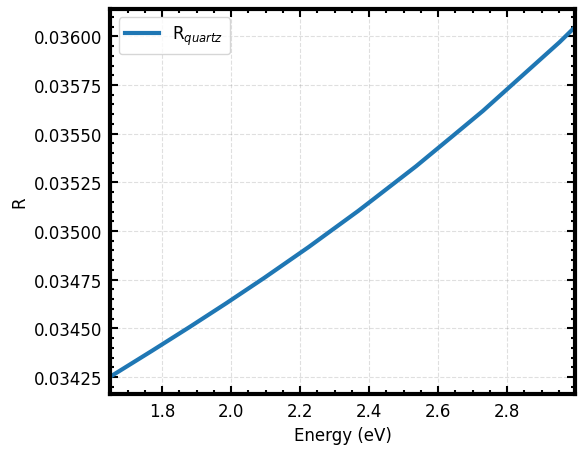

In [ ]:
plt.plot(energy_array, PETG_reflectance_array , label = 'R$_{PETG}$')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)')
plt.ylabel('R')
plt.legend(); plt.show()

plt.plot(energy_array, PDMS_reflectance_array , label = 'R$_{PDMS}$')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)')
plt.ylabel('R')
plt.legend(); plt.show()

plt.plot(energy_array, quartz_reflectance_array , label = 'R$_{quartz}$')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)')
plt.ylabel('R')
plt.legend(); plt.show()


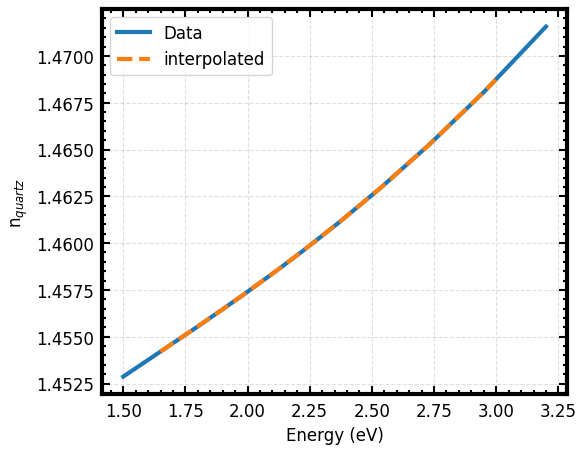

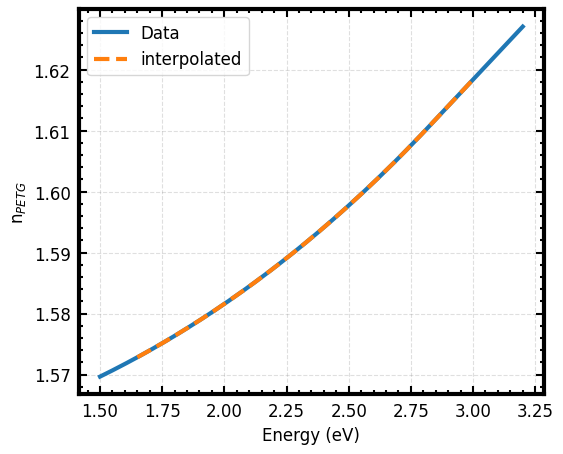

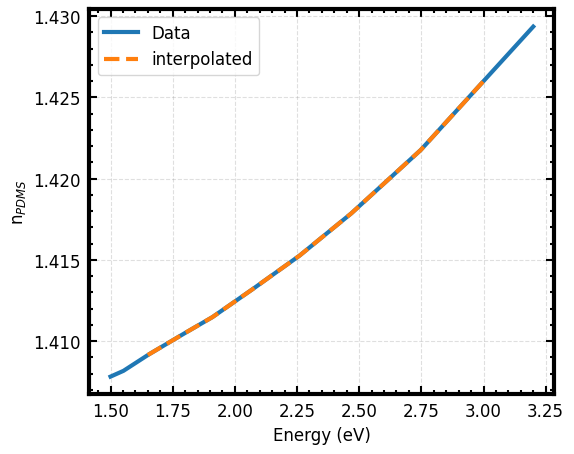

In [ ]:
plt.plot(quartz_n_energy, quartz_n, label = 'Data')
plt.xlabel('Energy (eV)'); plt.ylabel('n$_{quartz}$');
plt.plot( energy_array, quartz_n_interpolated_array, '--', label = 'interpolated')
plt.legend(); plt.show()


plt.plot(PETG_energy, PETG_n, label = 'Data')
plt.xlabel('Energy (eV)'); plt.ylabel('n$_{PETG}$');
plt.plot( energy_array, PETG_n_interpolated_array, '--', label = 'interpolated')
plt.legend(); plt.show()

plt.plot(PDMS_energy, PDMS_n, label = 'Data')
plt.xlabel('Energy (eV)'); plt.ylabel('n$_{PDMS}$');
plt.plot( energy_array, PDMS_n_interpolated_array, '--', label = 'interpolated')
plt.legend(); plt.show()




# WS$_2 (PETG)$

## Pick what n_substare to use

In [ ]:
n_substrate_array = PETG_n_interpolated_array
n_substrate_array_fine = PETG_n_interpolated_array_fine
R_substrate_array = PETG_reflectance_array
n_substrate_name = 'n$_{PETG}$'
n_substrate = n_substrate_array.mean()


In [ ]:
WS2_bulk_real_energy = np.array(list(map(log_to_energy, WS2_bulk_real_log_energy_array)) )
WS2_bulk_imag_energy = np.array(list(map(log_to_energy, WS2_bulk_imag_log_energy_array)) )

WS2_bulk_eps_real_interpolator = interp1d(WS2_bulk_real_energy , WS2_bulk_real_array, kind = 1)
WS2_bulk_eps_real_interpolated = WS2_bulk_eps_real_interpolator(energy_array)


WS2_bulk_eps_imag_interpolator = interp1d(WS2_bulk_imag_energy , WS2_bulk_imag_array, kind = 1)
WS2_bulk_eps_imag_interpolated = WS2_bulk_eps_imag_interpolator(energy_array)



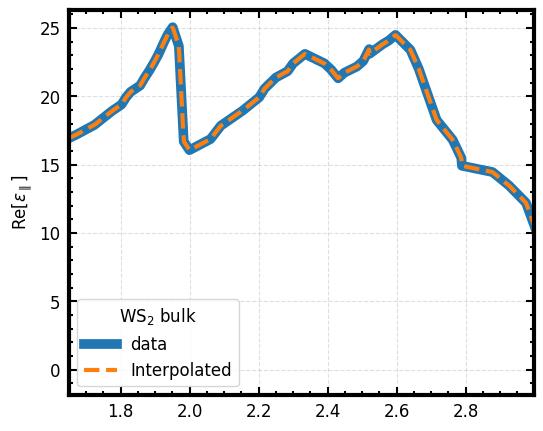

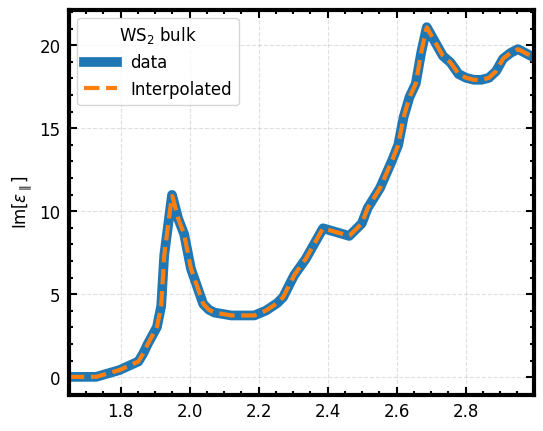

In [ ]:
plt.plot(WS2_bulk_real_energy , WS2_bulk_real_array, linewidth = '7' ,label = 'data')
plt.plot(energy_array,WS2_bulk_eps_real_interpolated , '--', label = 'Interpolated')
plt.xlim(energy_array.min(), energy_array.max())
plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ bulk'); plt.show()

plt.plot(WS2_bulk_imag_energy , WS2_bulk_imag_array, linewidth = '7' ,label = 'data')
plt.plot(energy_array, WS2_bulk_eps_imag_interpolated , '--', label = 'Interpolated')
plt.xlim(energy_array.min(), energy_array.max())
plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ bulk'); plt.show()


In [ ]:
refl_contrast_WS2_1L_PETG_interpolator  = interp1d( refl_WS2_1L_PETG['eV'], refl_WS2_1L_PETG['reflectance contrast'], kind =1)


refl_WS2_1L_PETG_interpolated = (refl_contrast_WS2_1L_PETG_interpolator (energy_array) + 1)*R_substrate_array
#refl_WS2_1L_PETG_interpolated = refl_contrast_WS2_1L_PETG_interpolator (energy_array)

#refl_WS2_1L_PETG_interpolator_fine = interp1d(refl_WS2_1L_PETG['eV'], refl_WS2_1L_PETG['reflectance contrast'], kind = 1)

refl_WS2_1L_PETG_interpolator_fine = interp1d( energy_array, refl_WS2_1L_PETG_interpolated, kind =1)
refl_WS2_1L_PETG_interpolated_fine = refl_WS2_1L_PETG_interpolator_fine(energy_array_fine)

inplane_imag_WS2_bulk_interpolator = interp1d( bdata_WS2[1], bdata_WS2[3], kind =3)
inplane_imag_WS2_bulk_interpolated = inplane_imag_WS2_bulk_interpolator(energy_array)

inplane_imag_WS2_bulk_interpolator = interp1d(  bdata_WS2[1], bdata_WS2[3], kind =3)

bdata_WS2_energy_interpolated = np.arange(1, 26, bdata_energy_delta )

inplane_imag_WS2_bulk_interpolated = inplane_imag_WS2_bulk_interpolator(bdata_WS2_energy_interpolated)

bdata_WS2_interpolated_by_energy_delta = pd.DataFrame({1: bdata_WS2_energy_interpolated, 2: energy_delta, 3:inplane_imag_WS2_bulk_interpolated })
bdata_WS2_interpolated_by_energy_delta = bdata_WS2_interpolated_by_energy_delta.head(len_energy_array )

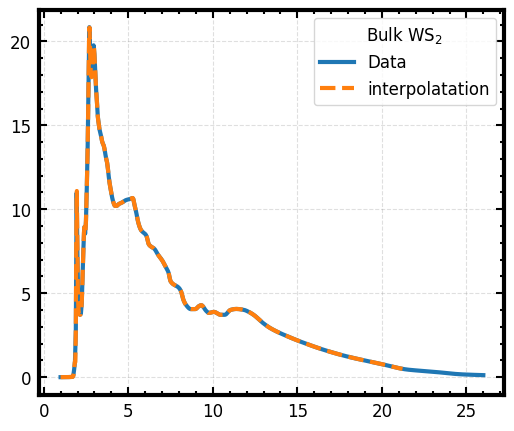

In [ ]:
plt.plot(bdata_WS2[1], bdata_WS2[3], label = 'Data')
plt.plot(bdata_WS2_interpolated_by_energy_delta[1], bdata_WS2_interpolated_by_energy_delta[3], '--', label = 'interpolatation')
plt.legend(title = 'Bulk WS$_2$')
plt.show()

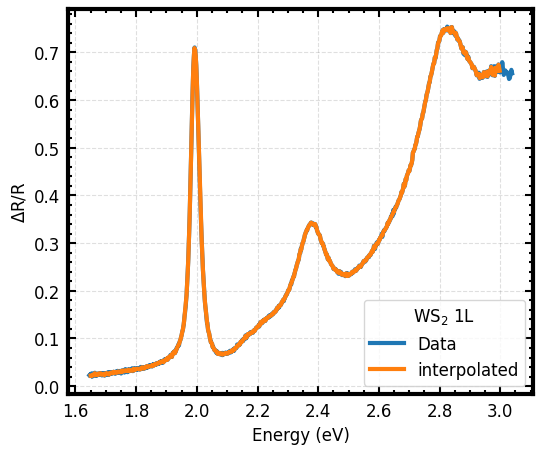

In [ ]:
plt.plot( refl_WS2_1L_PETG['eV'], refl_WS2_1L_PETG['reflectance contrast'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_1L_PETG_interpolator (energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = 'WS$_2$ 1L');
plt.show()

In [ ]:

refl_contrast_WS2_2L_interpolator = interp1d( refl_WS2_2L_PETG['eV'], refl_WS2_2L_PETG['reflectance contrast'], kind =1)
refl_WS2_2L_PETG_interpolated = (refl_contrast_WS2_2L_interpolator(energy_array) + 1)*R_substrate_array

refl_WS2_2L_PETG_interpolator_fine = interp1d( energy_array, refl_WS2_2L_PETG_interpolated, kind =1)
refl_WS2_2L_PETG_interpolated_fine = refl_WS2_2L_PETG_interpolator_fine(energy_array_fine)

#refl_WS2_1L_PETG_interpolated = refl_contrast_WS2_1L_PETG_interpolator (energy_array)
#refl_WS2_1L_PETG_interpolator_fine = interp1d(refl_WS2_1L_PETG['eV'], refl_WS2_1L_PETG['reflectance contrast'], kind = 1)



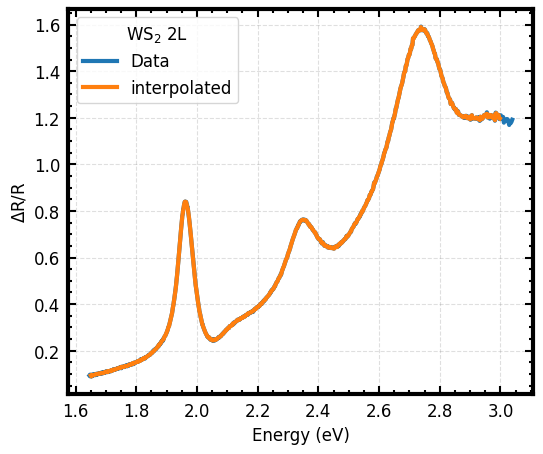

In [ ]:
plt.plot( refl_WS2_2L_PETG['eV'], refl_WS2_2L_PETG['reflectance contrast'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_2L_interpolator(energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = 'WS$_2$ 2L');
plt.show()

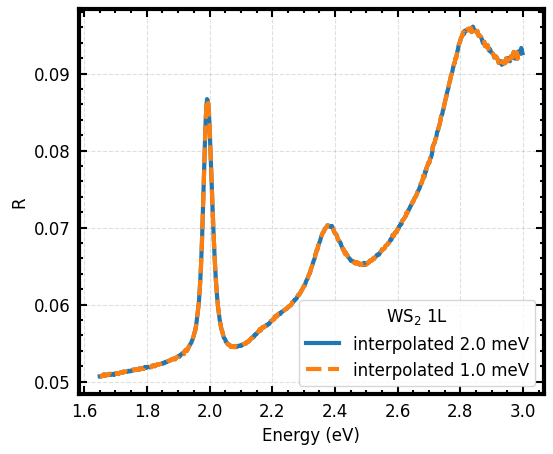

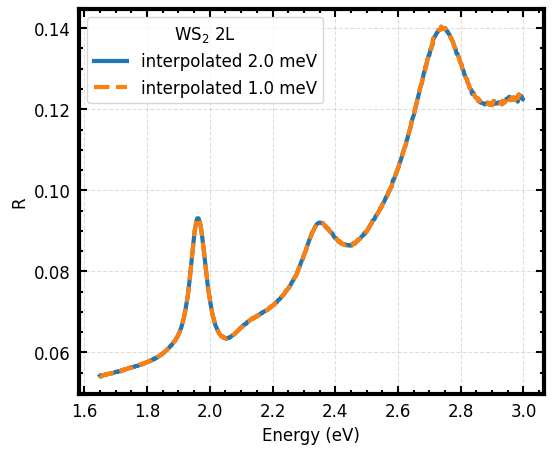

In [ ]:

#plt.plot(refl_WS2_1L_PETG['eV'], refl_WS2_1L_PETG['reflectance contrast'], linewidth = '7', label = 'Data')

plt.plot( energy_array, refl_WS2_1L_PETG_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.plot(energy_array_fine, refl_WS2_1L_PETG_interpolated_fine, '--' , label = 'interpolated %s meV' %str(energy_delta_fine*1000) )
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = 'WS$_2$ 1L')

plt.savefig(output_folder_path + "/reflection_of_WS2_1L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot( energy_array, refl_WS2_2L_PETG_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.plot(energy_array_fine, refl_WS2_2L_PETG_interpolated_fine, '--' , label = 'interpolated %s meV' %str(energy_delta_fine*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = 'WS$_2$ 2L')

plt.savefig(output_folder_path + "/reflection_of_WS2_2L.png", bbox_inches='tight')
plt.show()
plt.close()



## 1L

### Initial Guess from bulk

In [ ]:
WS2_1L_eps1_from_bulk, WS2_1L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_WS2, bdata = bdata_WS2)

In [ ]:
#initial_lorentzian_guess_WS2_1L = np.sum((2/np.pi)*(bdata_WS2_interpolated_by_energy_delta[3][:,np.newaxis]*bdata_WS2_interpolated_by_energy_delta[1][:,np.newaxis]*bdata_WS2_interpolated_by_energy_delta[2][:,np.newaxis])*bdata_WS2_interpolated_by_energy_delta[2][:,np.newaxis]*energy_array/((bdata_WS2_interpolated_by_energy_delta[1][:,np.newaxis]**2 - energy_array**2)**2+ bdata_WS2_interpolated_by_energy_delta[2][:,np.newaxis]**2*energy_array**2), axis=0)

initial_lorentzian_guess_WS2_1L = refl_WS2_1L_PETG_interpolated*200-10

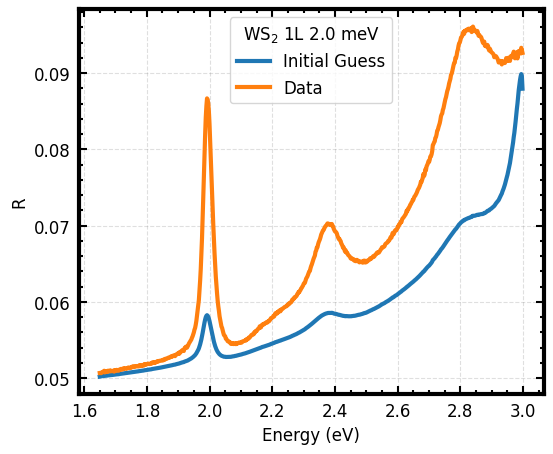

In [ ]:

guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_WS2_1L, t = t_1L_WS2, n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =WS2_1L_eps1_from_bulk, eps2_from_bulk=  WS2_1L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')
plt.plot(energy_array, refl_WS2_1L_PETG_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 1L %s meV' %str(energy_delta*1000))
plt.show()

In [ ]:
eps1_init = np.zeros((len_energy_array, 2))
eps1_init[:,0] = energy_array
eps1_init[:, 1] = 30
eps2_init = np.zeros((len_energy_array, 2))
eps2_init[:, 0] = energy_array

for i in range(len_energy_array):

    eps1_i = (2*gamma/cmath.pi*energy_array[i]*initial_lorentzian_guess_WS2_1L[i])*(energy_array[i]**2- energy_array**2)/((energy_array[i]**2- energy_array**2)**2+ gamma**2*energy_array**2)
    eps2_i = (2*gamma/cmath.pi*energy_array[i]*initial_lorentzian_guess_WS2_1L[i])*gamma*energy_array/(((energy_array[i]**2- energy_array**2)**2+ gamma**2*energy_array**2))
    eps1_init[:, 1] = eps1_init[:, 1] + eps1_i
    eps2_init[:, 1] = eps2_init[:, 1] + eps2_i



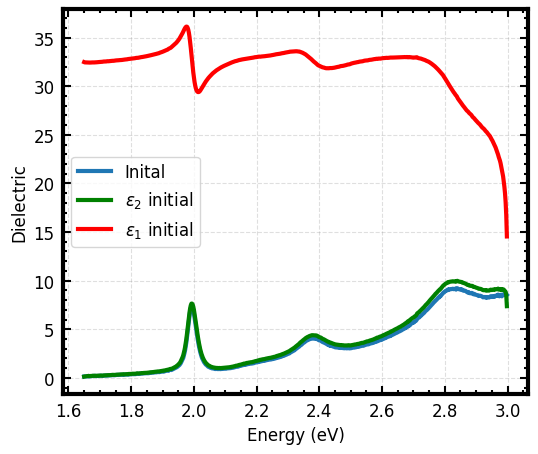

In [ ]:

plt.plot(energy_array, initial_lorentzian_guess_WS2_1L, label = 'Inital')

plt.plot(energy_array, eps2_init[:, 1], 'g', label = '$\epsilon_2$ initial')
plt.plot(energy_array, eps1_init[:, 1], 'r', label = '$\epsilon_1$ initial')
plt.xlabel('Energy (eV)'); plt.ylabel('Dielectric')
plt.legend()
plt.show()




### Reflection fit

In [ ]:
WS2_1L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, t = t_1L_WS2, n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_1L_eps1_from_bulk, eps2_from_bulk = WS2_1L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_1L_PETG_interpolated, p0 = initial_lorentzian_guess_WS2_1L , bounds = (0, 100))

WS2_1L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_1L_reflection_with_n_popt, t= t_1L_WS2, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_1L_eps1_from_bulk,eps2_from_bulk =  WS2_1L_eps2_from_bulk)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:

WS2_1L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_1L_reflection_with_n_popt, t= t_1L_WS2, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_1L_eps1_from_bulk,eps2_from_bulk =  WS2_1L_eps2_from_bulk)

In [ ]:

plt.plot(energy_array, refl_WS2_1L_PETG_interpolated, label = 'Data')
plt.plot(energy_array, WS2_1L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 1L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_1L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric functions

In [ ]:
WS2_1L_inplane_real, WS2_1L_inplane_imag  = dielectric_functions(energy_array, WS2_1L_reflection_with_n_popt, gamma = gamma,eps1_from_bulk = WS2_1L_eps1_from_bulk, eps2_from_bulk = WS2_1L_eps2_from_bulk )


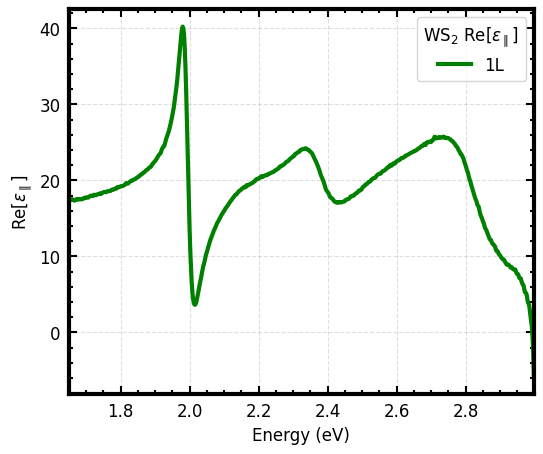

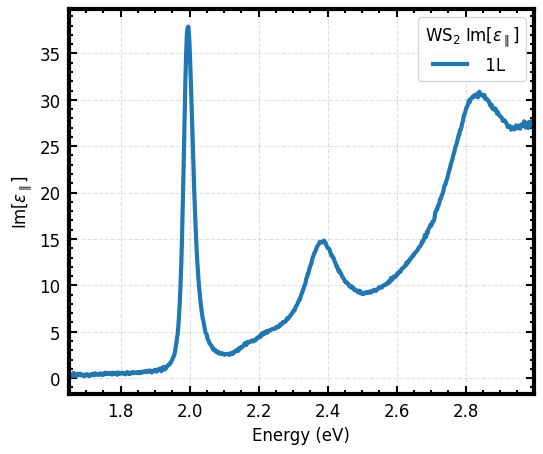

In [ ]:
plt.plot(energy_array, WS2_1L_inplane_real, 'g', label = '1L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_1L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_1L_inplane_imag, label = ' 1L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_1L.png", bbox_inches='tight')
plt.show()
plt.close()

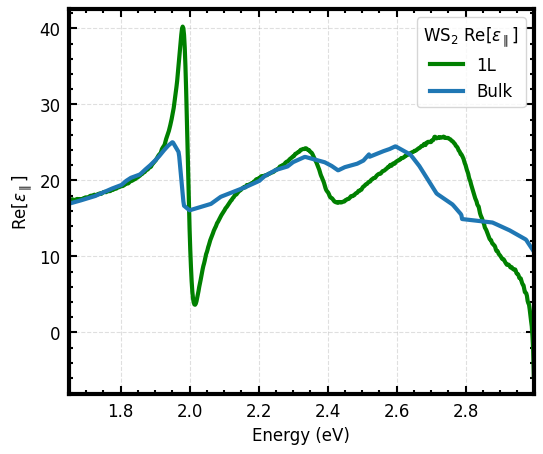

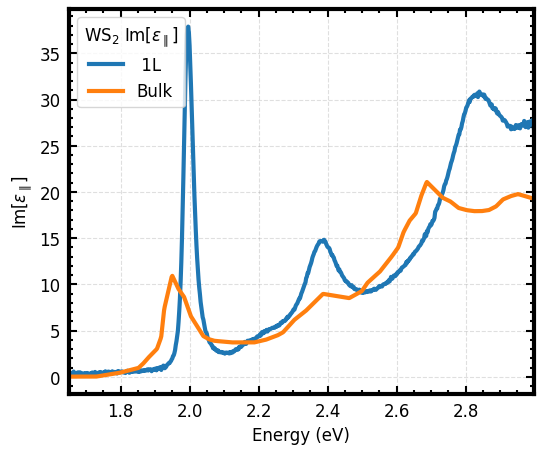

In [ ]:
plt.plot(energy_array, WS2_1L_inplane_real, 'g', label = '1L')
plt.plot(energy_array,  WS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ '+ inplane_real_text)

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_1L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_1L_inplane_imag, label = ' 1L ')
plt.plot(energy_array,  WS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)

plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_1L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## 2L

### Initial Guess from bulk

In [ ]:
WS2_2L_eps1_from_bulk, WS2_2L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_WS2, bdata = bdata_WS2)

In [ ]:

#initial_lorentzian_guess_WS2_2L = np.sum((2/np.pi)*(bdata_WS2_interpolated_by_energy_delta[3][:,np.newaxis]*bdata_WS2_interpolated_by_energy_delta[1][:,np.newaxis]*bdata_WS2_interpolated_by_energy_delta[2][:,np.newaxis])*bdata_WS2_interpolated_by_energy_delta[2][:,np.newaxis]*energy_array/((bdata_WS2_interpolated_by_energy_delta[1][:,np.newaxis]**2 - energy_array**2)**2+ bdata_WS2_interpolated_by_energy_delta[2][:,np.newaxis]**2*energy_array**2), axis=0)

initial_lorentzian_guess_WS2_2L = WS2_bulk_eps_imag_interpolated/6

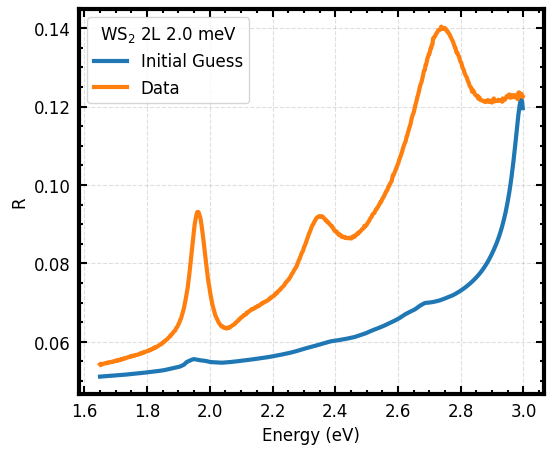

In [ ]:
guess_data = fit_mult_osc(energy_array, *WS2_bulk_eps_imag_interpolated/8 , t= t_1L_WS2*2,  n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =WS2_2L_eps1_from_bulk, eps2_from_bulk=  WS2_2L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_WS2_2L_PETG_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L %s meV' %str(energy_delta*1000))
plt.show()

### Reflection Fit

In [ ]:
WS2_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_WS2*2, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_2L_PETG_interpolated, p0 = initial_lorentzian_guess_WS2_2L, bounds = (0, 100))

WS2_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk =  WS2_2L_eps2_from_bulk, t = t_1L_WS2*2)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


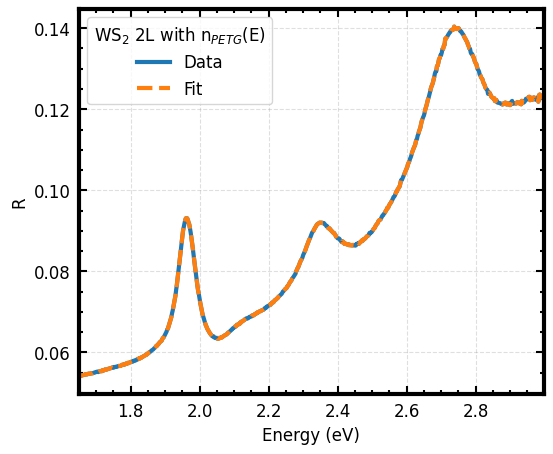

In [ ]:
plt.plot(energy_array, refl_WS2_2L_PETG_interpolated, label = 'Data')
plt.plot(energy_array, WS2_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric Functions

In [ ]:
WS2_2L_inplane_real, WS2_2L_inplane_imag  = dielectric_functions(energy_array, WS2_2L_reflection_with_n_popt,
                                                                 gamma = gamma,eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk)


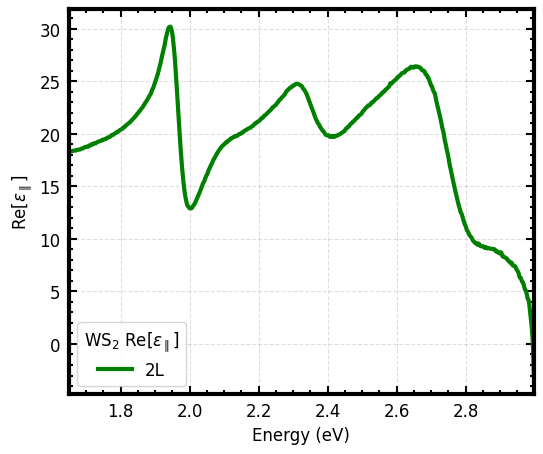

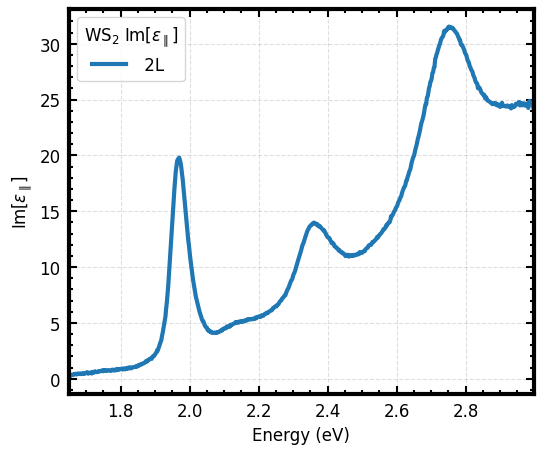

In [ ]:
plt.plot(energy_array, WS2_2L_inplane_real, 'g', label = '2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_2L_inplane_imag, label = ' 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

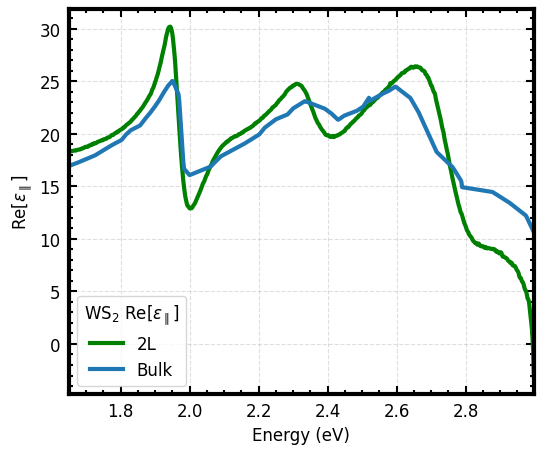

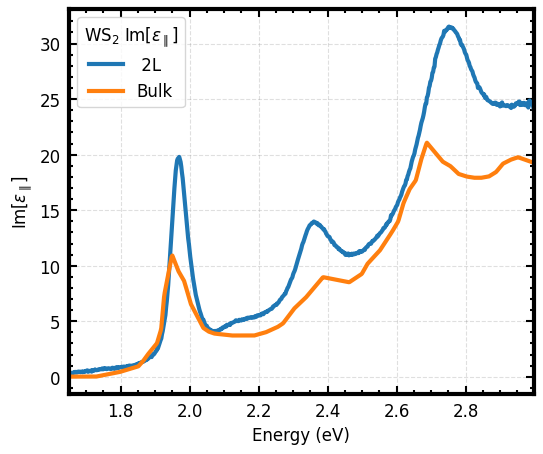

In [ ]:
plt.plot(energy_array, WS2_2L_inplane_real, 'g', label = '2L')
plt.plot(energy_array,  WS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_2L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_2L_inplane_imag, label = ' 2L ')
plt.plot(energy_array,  WS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_2L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## WS$_2$ All layers $\epsilon_{\parallel}$ combined

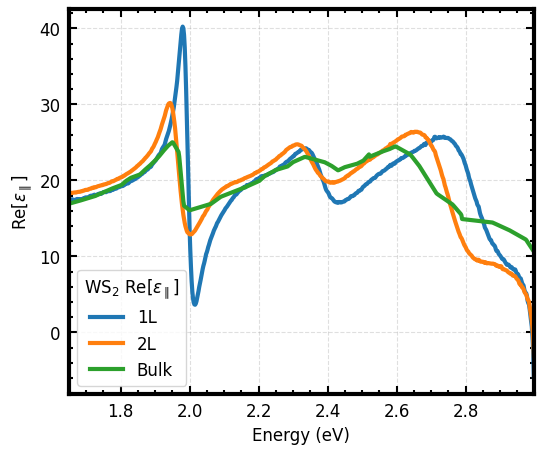

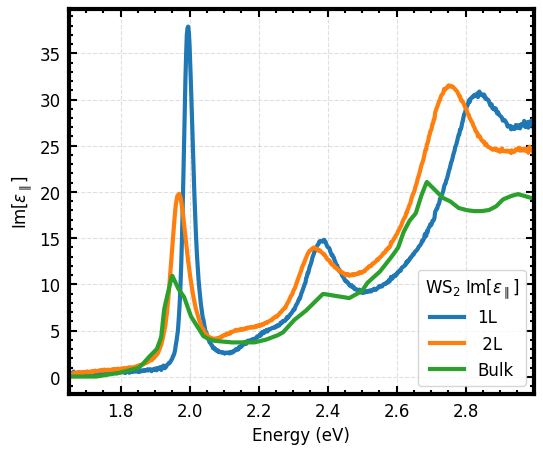

In [ ]:

plt.plot(energy_array, WS2_1L_inplane_real, label = '1L')
plt.plot(energy_array, WS2_2L_inplane_real, label = '2L')
plt.plot(energy_array,  WS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_1L_inplane_imag, label = '1L')
plt.plot(energy_array, WS2_2L_inplane_imag, label = ' 2L ')

plt.plot(energy_array,  WS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2.png", bbox_inches='tight')
plt.show()
plt.close()

#WS$_2$ (PDMS)

##Substrate Picking and interpolations


In [ ]:
n_substrate_array = PDMS_n_interpolated_array
n_substrate_array_fine = PDMS_n_interpolated_array_fine
R_substrate_array = PDMS_reflectance_array
n_substrate_name = 'n$_{PDMS}$'
n_substrate = n_substrate_array.mean()

In [ ]:
refl_contrast_WS2_11_1_2L_PETG_interpolator  = interp1d( refl_WS2_2023_09_05_2L_PDMS['energy'],refl_WS2_2023_09_05_2L_PDMS['11_1'], kind =1)
refl_contrast_WS2_11_2_2L_PETG_interpolator  = interp1d( refl_WS2_2023_09_05_2L_PDMS['energy'],refl_WS2_2023_09_05_2L_PDMS['11_2'], kind =1)

refl_contrast_WS2_14_1_2L_PETG_interpolator  = interp1d( refl_WS2_2023_09_05_2L_PDMS['energy'],refl_WS2_2023_09_05_2L_PDMS['14_1'], kind =1)
refl_contrast_WS2_14_2_2L_PETG_interpolator  = interp1d( refl_WS2_2023_09_05_2L_PDMS['energy'],refl_WS2_2023_09_05_2L_PDMS['14_2'], kind =1)
refl_contrast_WS2_14_3_2L_PETG_interpolator  = interp1d( refl_WS2_2023_09_05_2L_PDMS['energy'],refl_WS2_2023_09_05_2L_PDMS['14_3'], kind =1)


refl_WS2_11_1_2L_PDMS_interpolated = (refl_contrast_WS2_11_1_2L_PETG_interpolator (energy_array) + 1)*R_substrate_array
refl_WS2_11_2_2L_PDMS_interpolated = (refl_contrast_WS2_11_2_2L_PETG_interpolator (energy_array) + 1)*R_substrate_array


refl_WS2_14_1_2L_PDMS_interpolated = (refl_contrast_WS2_14_1_2L_PETG_interpolator (energy_array) + 1)*R_substrate_array
refl_WS2_14_2_2L_PDMS_interpolated = (refl_contrast_WS2_14_2_2L_PETG_interpolator (energy_array) + 1)*R_substrate_array
refl_WS2_14_3_2L_PDMS_interpolated = (refl_contrast_WS2_14_3_2L_PETG_interpolator (energy_array) + 1)*R_substrate_array

inplane_imag_WS2_bulk_interpolator = interp1d( bdata_WS2[1], bdata_WS2[3], kind =3)
inplane_imag_WS2_bulk_interpolated = inplane_imag_WS2_bulk_interpolator(energy_array)

inplane_imag_WS2_bulk_interpolator = interp1d(  bdata_WS2[1], bdata_WS2[3], kind =3)

bdata_WS2_energy_interpolated = np.arange(1, 26, bdata_energy_delta )

inplane_imag_WS2_bulk_interpolated = inplane_imag_WS2_bulk_interpolator(bdata_WS2_energy_interpolated)

bdata_WS2_interpolated_by_energy_delta = pd.DataFrame({1: bdata_WS2_energy_interpolated, 2: energy_delta, 3:inplane_imag_WS2_bulk_interpolated })
bdata_WS2_interpolated_by_energy_delta = bdata_WS2_interpolated_by_energy_delta.head(len_energy_array )

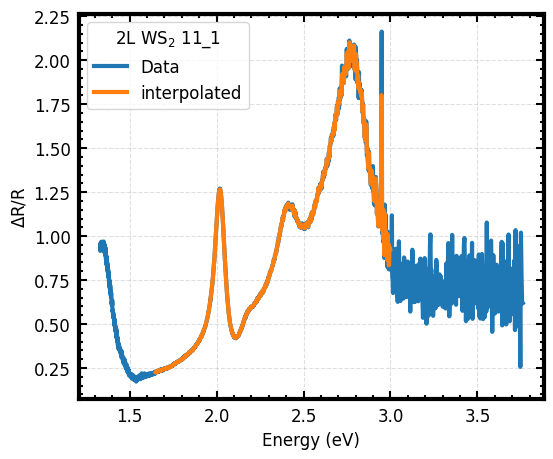

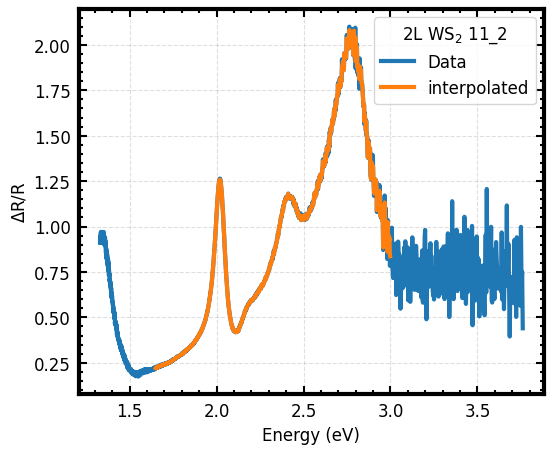

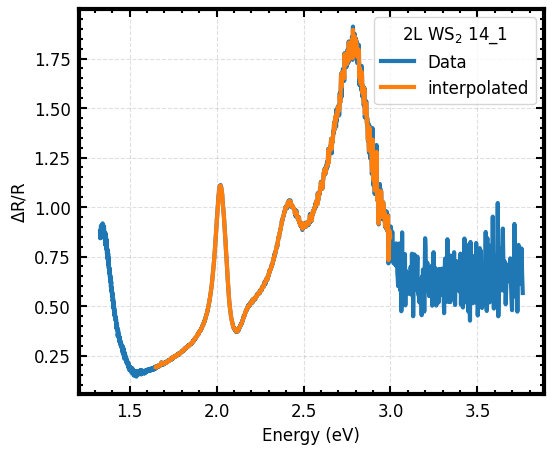

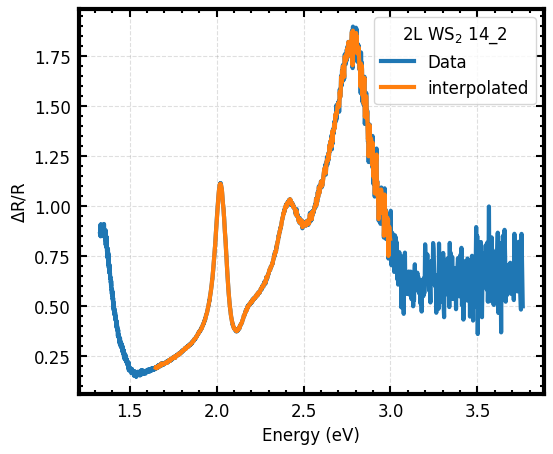

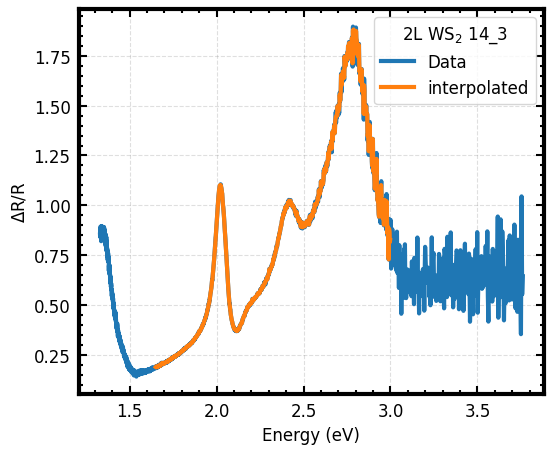

In [ ]:
plt.plot( refl_WS2_2023_09_05_2L_PDMS['energy'], refl_WS2_2023_09_05_2L_PDMS['11_1'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_11_1_2L_PETG_interpolator (energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = '2L WS$_2$ 11_1');
plt.show()

plt.plot( refl_WS2_2023_09_05_2L_PDMS['energy'], refl_WS2_2023_09_05_2L_PDMS['11_2'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_11_2_2L_PETG_interpolator (energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = '2L WS$_2$ 11_2');
plt.show()

plt.plot( refl_WS2_2023_09_05_2L_PDMS['energy'], refl_WS2_2023_09_05_2L_PDMS['14_1'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_14_1_2L_PETG_interpolator (energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = '2L WS$_2$ 14_1');
plt.show()

plt.plot( refl_WS2_2023_09_05_2L_PDMS['energy'], refl_WS2_2023_09_05_2L_PDMS['14_2'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_14_2_2L_PETG_interpolator (energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = '2L WS$_2$ 14_2');
plt.show()

plt.plot( refl_WS2_2023_09_05_2L_PDMS['energy'], refl_WS2_2023_09_05_2L_PDMS['14_3'], label = 'Data')
plt.plot( energy_array, refl_contrast_WS2_14_3_2L_PETG_interpolator (energy_array), label = 'interpolated')
plt.xlabel(energy_text);plt.ylabel(reflectance_contrast_text)
plt.legend(title = '2L WS$_2$ 14_3');
plt.show()

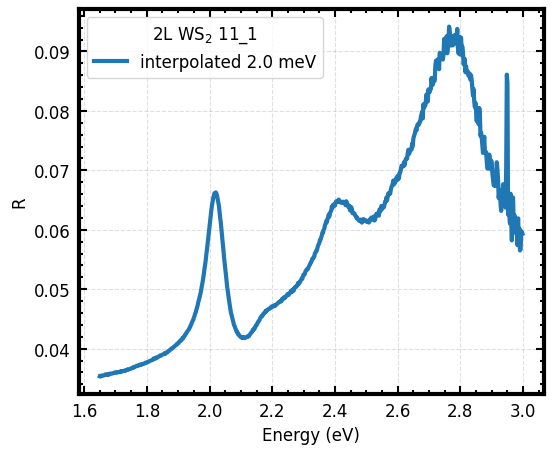

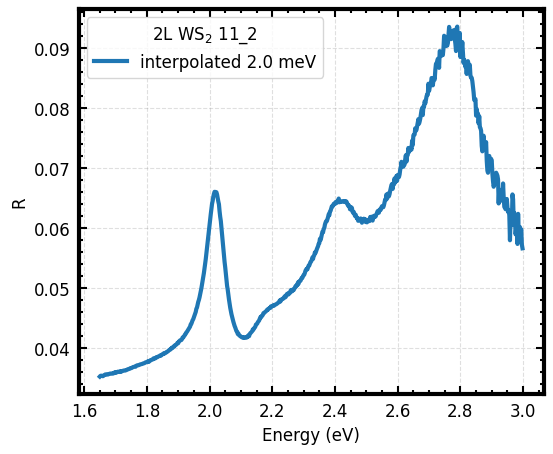

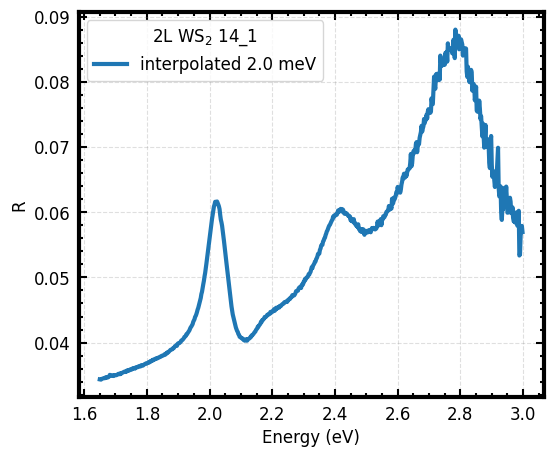

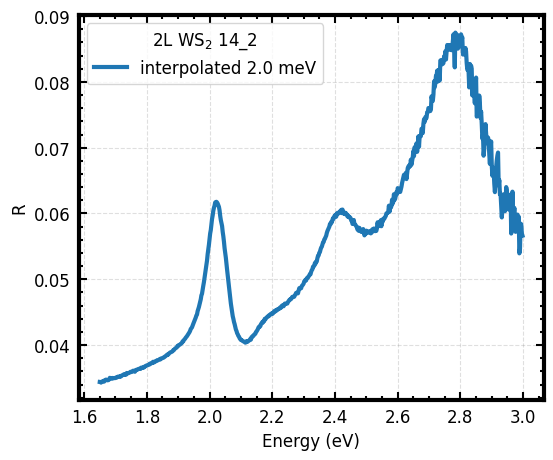

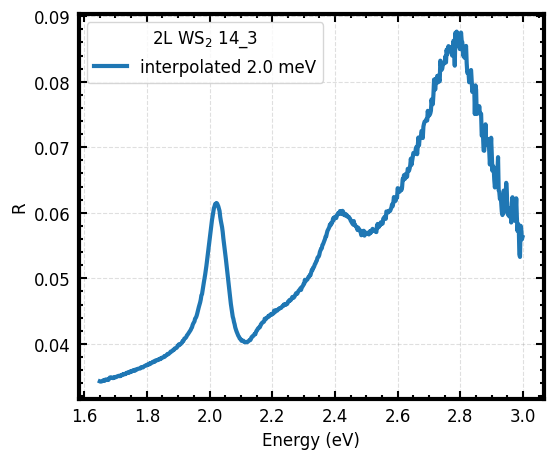

In [ ]:
#

plt.plot( energy_array, refl_WS2_11_1_2L_PDMS_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = '2L WS$_2$ 11_1')

plt.savefig(output_folder_path + "/reflection_of_WS2_11_1_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot( energy_array, refl_WS2_11_2_2L_PDMS_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = '2L WS$_2$ 11_2')

plt.savefig(output_folder_path + "/reflection_of_WS2_11_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()


plt.plot( energy_array, refl_WS2_14_1_2L_PDMS_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = '2L WS$_2$ 14_1')

plt.savefig(output_folder_path + "/reflection_of_WS2_14_1_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot( energy_array, refl_WS2_14_2_2L_PDMS_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = '2L WS$_2$ 14_2')

plt.savefig(output_folder_path + "/reflection_of_WS2_14_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot( energy_array, refl_WS2_14_3_2L_PDMS_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = '2L WS$_2$ 14_3')

plt.savefig(output_folder_path + "/reflection_of_WS2_14_3_2L.png", bbox_inches='tight')
plt.show()
plt.close()


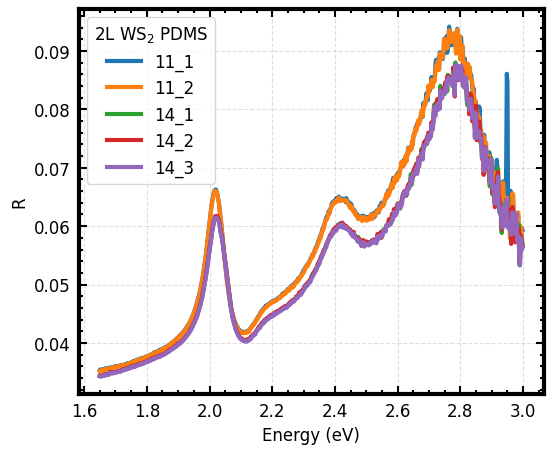

In [ ]:


plt.plot( energy_array, refl_WS2_11_1_2L_PDMS_interpolated,  label = '11_1' )
plt.plot( energy_array, refl_WS2_11_2_2L_PDMS_interpolated, label = '11_2' )
plt.plot( energy_array, refl_WS2_14_1_2L_PDMS_interpolated, label = '14_1' )
plt.plot( energy_array, refl_WS2_14_2_2L_PDMS_interpolated, label = '14_2' )
plt.plot( energy_array, refl_WS2_14_3_2L_PDMS_interpolated, label = '14_3' )

plt.xlabel('Energy (eV)'); plt.ylabel('R');
plt.legend(title = '2L WS$_2$ PDMS')

#plt.savefig(output_folder_path + "/reflection_of_WS2_14_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()


##2L

###Inital guess from bulk

In [ ]:
WS2_2L_eps1_from_bulk, WS2_2L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_WS2, bdata = bdata_WS2)

In [ ]:
initial_lorentzian_guess_WS2_2L = WS2_bulk_eps_imag_interpolated/1.2

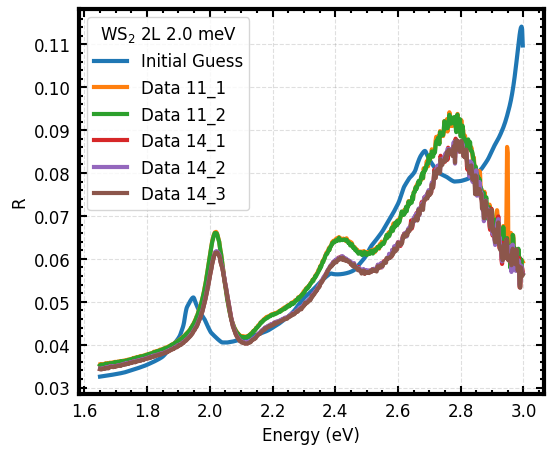

In [ ]:
guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_WS2_2L , t= t_1L_WS2*2,  n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =WS2_2L_eps1_from_bulk, eps2_from_bulk=  WS2_2L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_WS2_11_1_2L_PDMS_interpolated, label = 'Data 11_1')
plt.plot(energy_array, refl_WS2_11_2_2L_PDMS_interpolated, label = 'Data 11_2')

plt.plot(energy_array, refl_WS2_14_1_2L_PDMS_interpolated, label = 'Data 14_1')
plt.plot(energy_array, refl_WS2_14_2_2L_PDMS_interpolated, label = 'Data 14_2')
plt.plot(energy_array, refl_WS2_14_3_2L_PDMS_interpolated, label = 'Data 14_3')

plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L %s meV' %str(energy_delta*1000))
plt.show()

###Reflection Fit

In [ ]:
WS2_11_1_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_WS2*2, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_11_1_2L_PDMS_interpolated, p0 = initial_lorentzian_guess_WS2_2L, bounds = (0, 100))

WS2_11_1_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_11_1_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk =  WS2_2L_eps2_from_bulk, t = t_1L_WS2*2)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
WS2_11_2_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_WS2*2, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_11_2_2L_PDMS_interpolated, p0 = initial_lorentzian_guess_WS2_2L, bounds = (0, 100))

WS2_11_2_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_11_2_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk =  WS2_2L_eps2_from_bulk, t = t_1L_WS2*2)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
WS2_14_1_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_WS2*2, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_14_1_2L_PDMS_interpolated, p0 = initial_lorentzian_guess_WS2_2L, bounds = (0, 100))

WS2_14_1_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_14_1_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk =  WS2_2L_eps2_from_bulk, t = t_1L_WS2*2)

In [ ]:
WS2_14_2_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_WS2*2, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_14_2_2L_PDMS_interpolated, p0 = initial_lorentzian_guess_WS2_2L, bounds = (0, 100))

WS2_14_2_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_14_2_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk =  WS2_2L_eps2_from_bulk, t = t_1L_WS2*2)

In [ ]:
WS2_14_3_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_WS2*2, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_WS2_14_3_2L_PDMS_interpolated, p0 = initial_lorentzian_guess_WS2_2L, bounds = (0, 100))

WS2_14_3_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *WS2_14_3_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk =  WS2_2L_eps2_from_bulk, t = t_1L_WS2*2)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


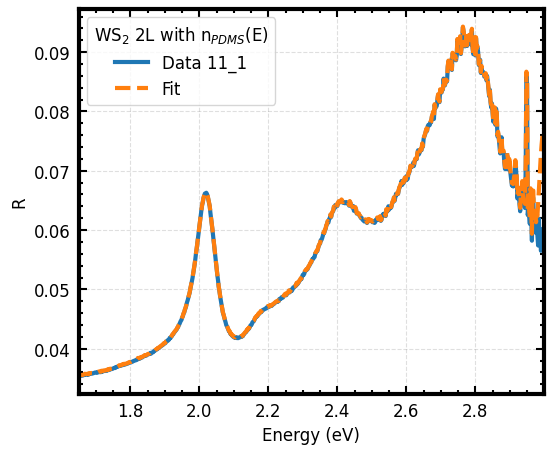

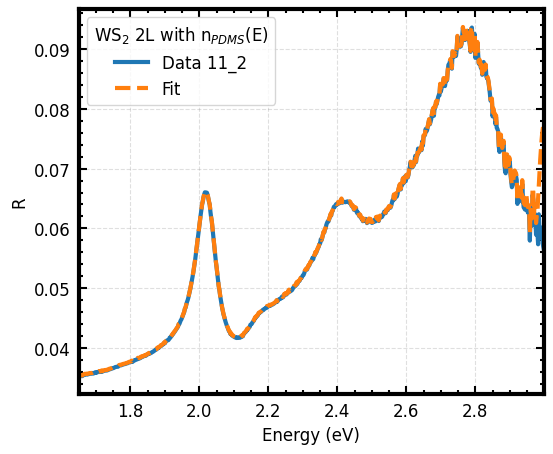

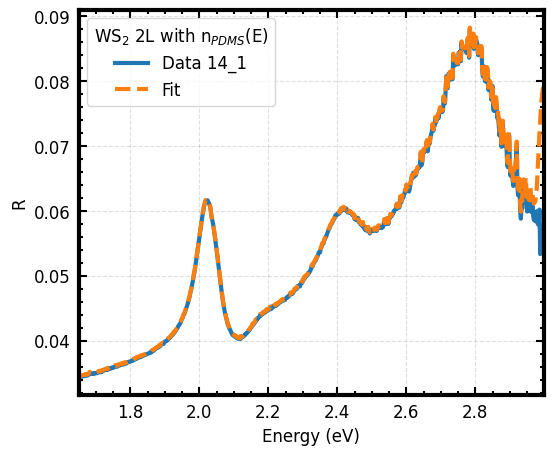

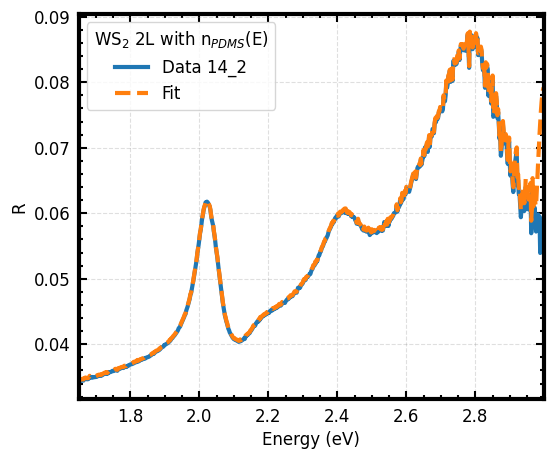

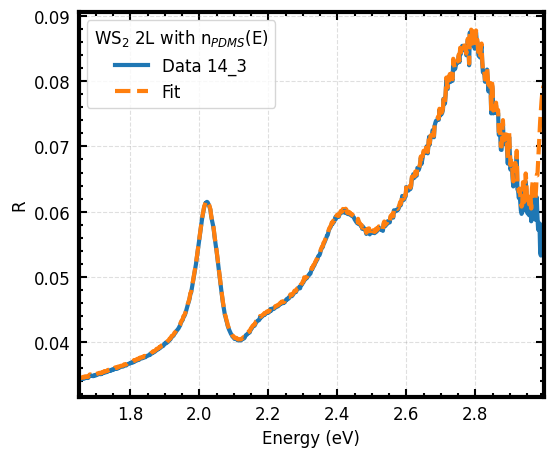

In [ ]:
plt.plot(energy_array, refl_WS2_11_1_2L_PDMS_interpolated, label = 'Data 11_1')
plt.plot(energy_array, WS2_11_1_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_11_1_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, refl_WS2_11_2_2L_PDMS_interpolated, label = 'Data 11_2')
plt.plot(energy_array, WS2_11_2_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_11_2_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, refl_WS2_14_1_2L_PDMS_interpolated, label = 'Data 14_1')
plt.plot(energy_array, WS2_14_1_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_14_1_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, refl_WS2_14_2_2L_PDMS_interpolated, label = 'Data 14_2')
plt.plot(energy_array, WS2_14_2_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_14_2_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, refl_WS2_14_3_2L_PDMS_interpolated, label = 'Data 14_3')
plt.plot(energy_array, WS2_14_3_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'WS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_WS2_14_3_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

###Dielectric functions

In [ ]:
WS2_11_1_2L_inplane_real, WS2_11_1_2L_inplane_imag  = dielectric_functions(energy_array, WS2_11_1_2L_reflection_with_n_popt,
                                                                 gamma = gamma,eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk)

WS2_11_2_2L_inplane_real, WS2_11_2_2L_inplane_imag  = dielectric_functions(energy_array, WS2_11_2_2L_reflection_with_n_popt,
                                                                 gamma = gamma,eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk)
WS2_14_1_2L_inplane_real, WS2_14_1_2L_inplane_imag  = dielectric_functions(energy_array, WS2_14_1_2L_reflection_with_n_popt,
                                                                 gamma = gamma,eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk)

WS2_14_2_2L_inplane_real, WS2_14_2_2L_inplane_imag  = dielectric_functions(energy_array, WS2_14_2_2L_reflection_with_n_popt,
                                                                 gamma = gamma,eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk)

WS2_14_3_2L_inplane_real, WS2_14_3_2L_inplane_imag  = dielectric_functions(energy_array, WS2_14_3_2L_reflection_with_n_popt,
                                                                 gamma = gamma,eps1_from_bulk = WS2_2L_eps1_from_bulk, eps2_from_bulk = WS2_2L_eps2_from_bulk)


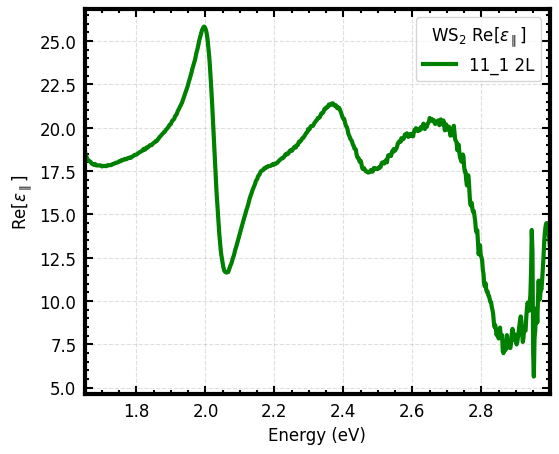

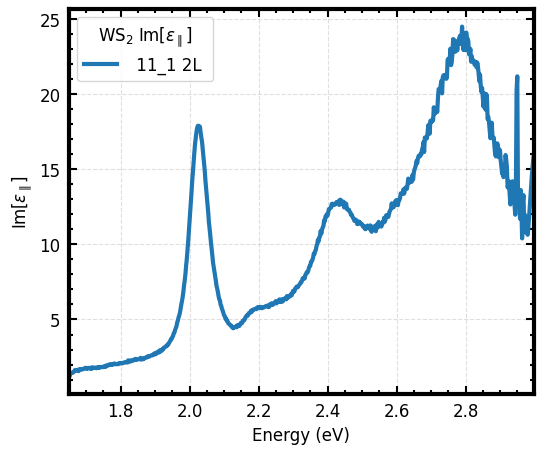

In [ ]:
plt.plot(energy_array,WS2_11_1_2L_inplane_real, 'g', label = '11_1 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_11_1_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_11_1_2L_inplane_imag, label = ' 11_1 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_11_1_2L.png", bbox_inches='tight')
plt.show()
plt.close()



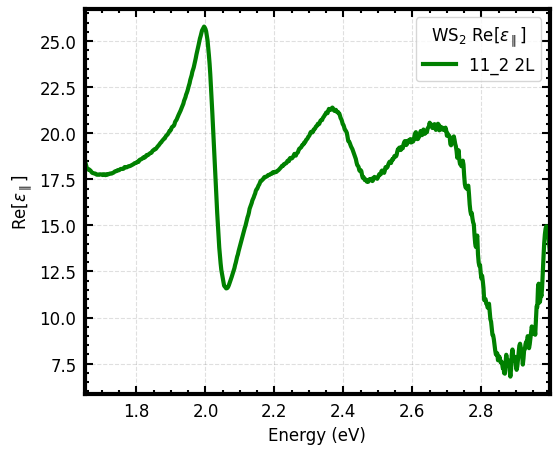

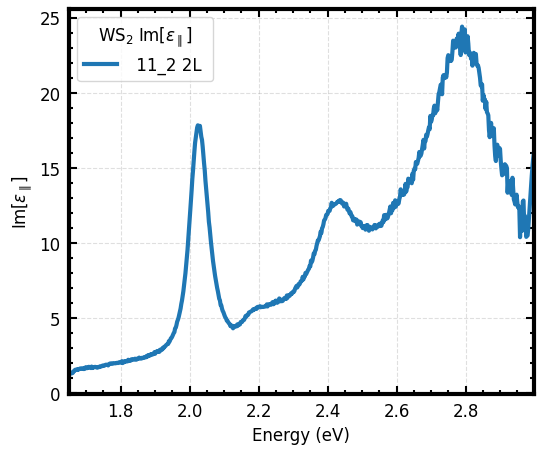

In [ ]:
plt.plot(energy_array,WS2_11_2_2L_inplane_real, 'g', label = '11_2 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_11_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_11_2_2L_inplane_imag, label = ' 11_2 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_11_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

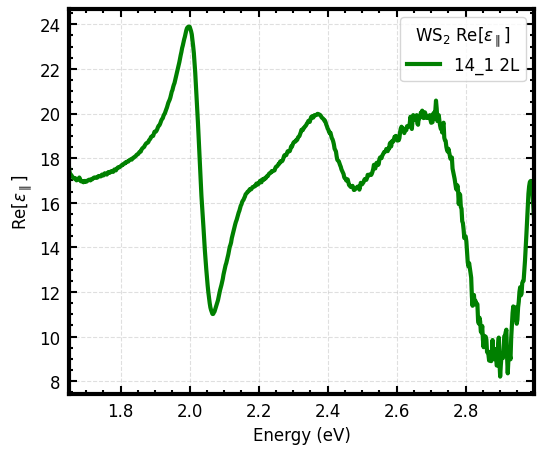

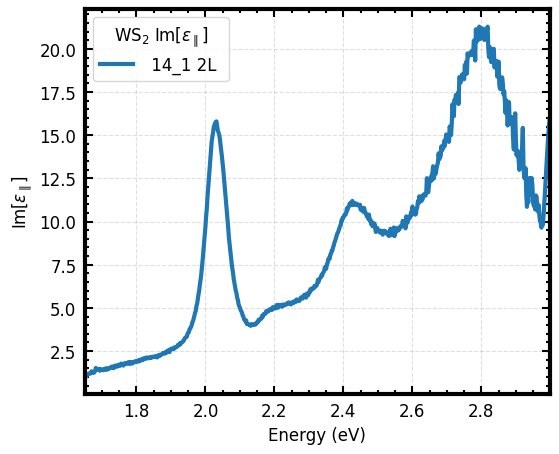

In [ ]:
plt.plot(energy_array,WS2_14_1_2L_inplane_real, 'g', label = '14_1 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_14_1_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_14_1_2L_inplane_imag, label = ' 14_1 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_14_1_2L.png", bbox_inches='tight')
plt.show()
plt.close()


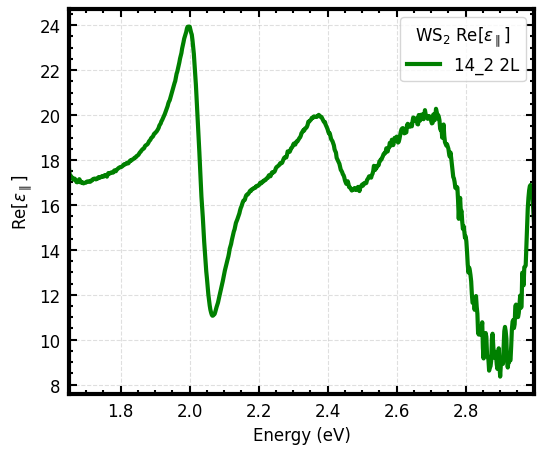

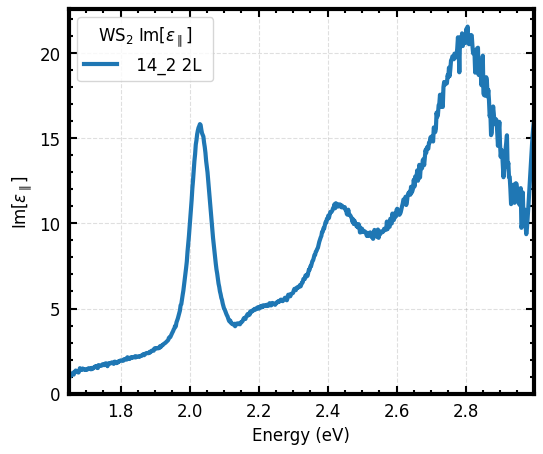

In [ ]:
plt.plot(energy_array,WS2_14_2_2L_inplane_real, 'g', label = '14_2 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_14_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_14_2_2L_inplane_imag, label = ' 14_2 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_14_2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

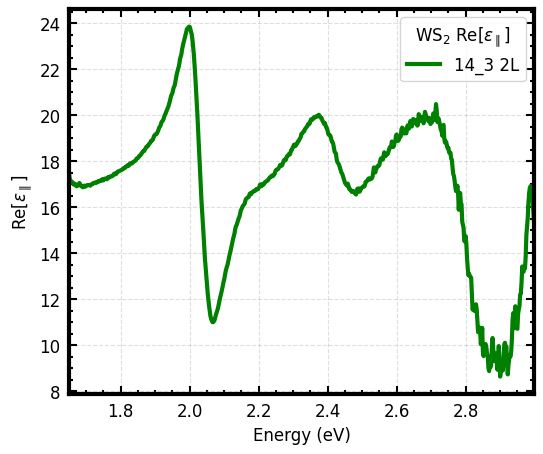

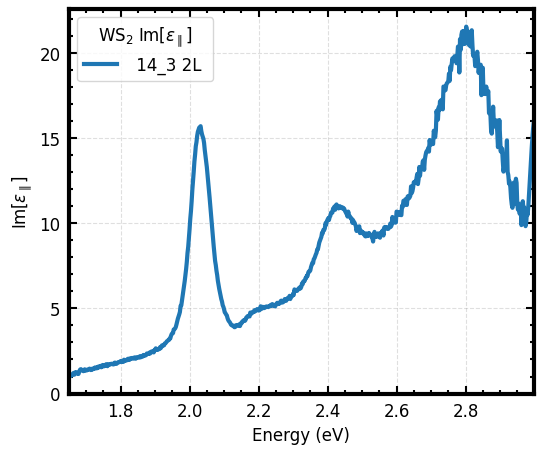

In [ ]:
plt.plot(energy_array,WS2_14_3_2L_inplane_real, 'g', label = '14_3 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_14_3_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_14_3_2L_inplane_imag, label = ' 14_3 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_14_3_2L.png", bbox_inches='tight')
plt.show()
plt.close()

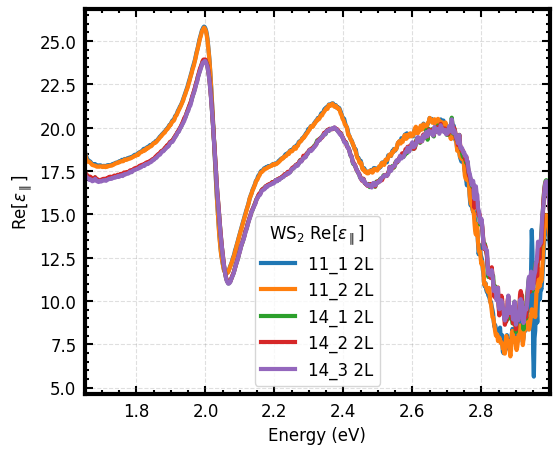

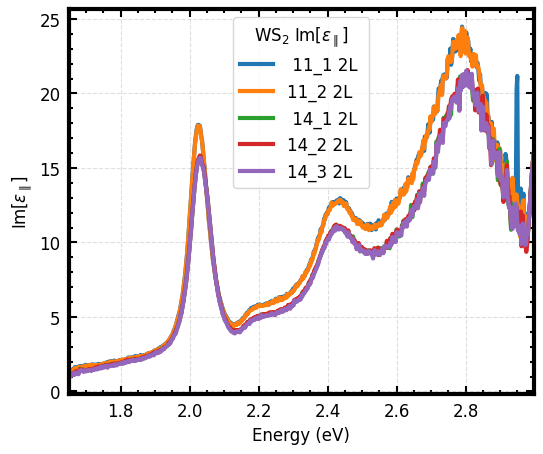

In [ ]:
plt.plot(energy_array,WS2_11_1_2L_inplane_real,   label = '11_1 2L')
plt.plot(energy_array,WS2_11_2_2L_inplane_real,  label = '11_2 2L')
plt.plot(energy_array,WS2_14_1_2L_inplane_real,   label = '14_1 2L')
plt.plot(energy_array,WS2_14_2_2L_inplane_real,  label = '14_2 2L')
plt.plot(energy_array,WS2_14_3_2L_inplane_real,  label = '14_3 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_11_14_combined_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_11_1_2L_inplane_imag, label = ' 11_1 2L ')
plt.plot(energy_array, WS2_11_2_2L_inplane_imag,  label = '11_2 2L')
plt.plot(energy_array, WS2_14_1_2L_inplane_imag, label = ' 14_1 2L ')
plt.plot(energy_array, WS2_14_2_2L_inplane_imag,  label = '14_2 2L')
plt.plot(energy_array, WS2_14_3_2L_inplane_imag,  label = '14_3 2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_11_14_combined_2L.png", bbox_inches='tight')
plt.show()
plt.close()

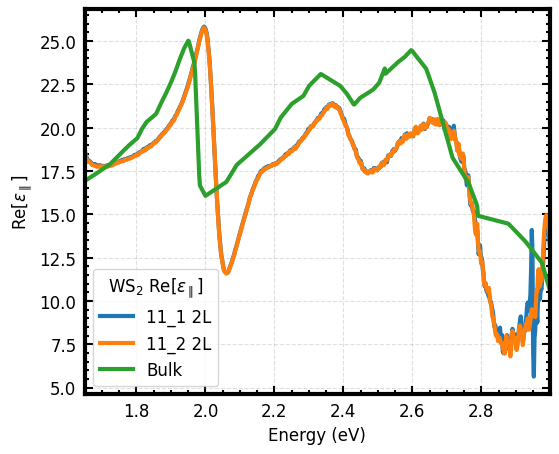

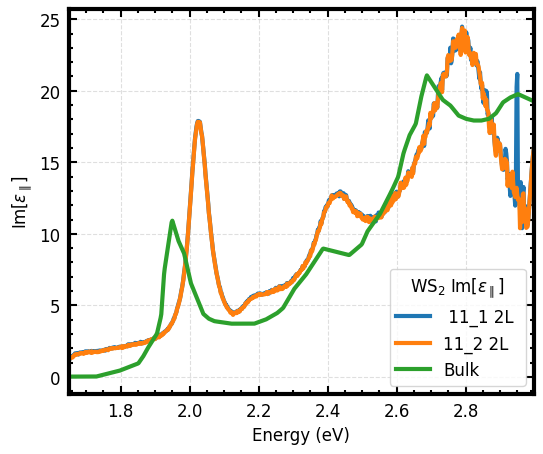

In [ ]:
plt.plot(energy_array,WS2_11_1_2L_inplane_real,   label = '11_1 2L')
plt.plot(energy_array,WS2_11_2_2L_inplane_real,  label = '11_2 2L')
plt.plot(energy_array,  WS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_11_combined_with bulk_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_11_1_2L_inplane_imag, label = ' 11_1 2L ')
plt.plot(energy_array, WS2_11_2_2L_inplane_imag,  label = '11_2 2L')
plt.plot(energy_array,  WS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_11_combined_with_bulk_2L.png", bbox_inches='tight')
plt.show()
plt.close()

#WS$_2$ combined


##2L

### PDMS vs PETG

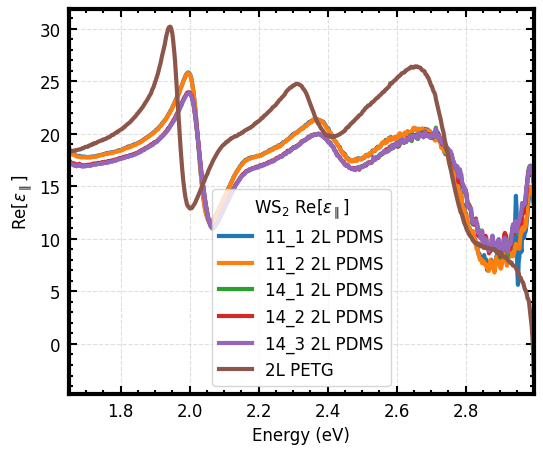

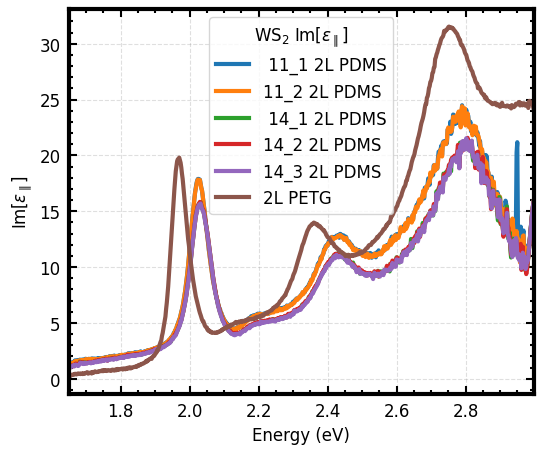

In [ ]:
plt.plot(energy_array,WS2_11_1_2L_inplane_real,   label = '11_1 2L PDMS')
plt.plot(energy_array,WS2_11_2_2L_inplane_real,  label = '11_2 2L PDMS')
plt.plot(energy_array,WS2_14_1_2L_inplane_real,   label = '14_1 2L PDMS')
plt.plot(energy_array,WS2_14_2_2L_inplane_real,  label = '14_2 2L PDMS')
plt.plot(energy_array,WS2_14_3_2L_inplane_real,  label = '14_3 2L PDMS')
plt.plot(energy_array, WS2_2L_inplane_real, label = '2L PETG')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_real_text)
plt.legend(title = 'WS$_2$ ' + inplane_real_text)
#plt.savefig(output_folder_path + "/inplane_dielectric_real_for_WS2_combined_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, WS2_11_1_2L_inplane_imag, label = ' 11_1 2L PDMS')
plt.plot(energy_array, WS2_11_2_2L_inplane_imag,  label = '11_2 2L PDMS')
plt.plot(energy_array, WS2_14_1_2L_inplane_imag, label = ' 14_1 2L PDMS')
plt.plot(energy_array, WS2_14_2_2L_inplane_imag,  label = '14_2 2L PDMS')
plt.plot(energy_array, WS2_14_3_2L_inplane_imag,  label = '14_3 2L PDMS')
plt.plot(energy_array, WS2_2L_inplane_imag, label = '2L PETG')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel(inplane_imag_text)
plt.legend(title = 'WS$_2$ ' + inplane_imag_text)

#plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_WS2_combined_2L.png", bbox_inches='tight')
plt.show()
plt.close()

# MoS$_2$

## Substrate picking and interpolations

In [ ]:
n_substrate_array = PDMS_n_interpolated_array
n_substrate_array_fine = PDMS_n_interpolated_array_fine
R_substrate_array = PDMS_reflectance_array
n_substrate_name = 'n$_{PDMS}$'
n_substrate = n_substrate_array.mean()


In [ ]:
MoS2_bulk_real_energy = np.array(list(map(log_to_energy, MoS2_bulk_real_log_energy_array)) )
MoS2_bulk_imag_energy = np.array(list(map(log_to_energy, MoS2_bulk_imag_log_energy_array)) )

MoS2_bulk_eps_real_interpolator = interp1d(MoS2_bulk_real_energy , MoS2_bulk_real_array, kind = 1)
MoS2_bulk_eps_real_interpolated = MoS2_bulk_eps_real_interpolator(energy_array)


MoS2_bulk_eps_imag_interpolator = interp1d(MoS2_bulk_imag_energy , MoS2_bulk_imag_array, kind = 1)
MoS2_bulk_eps_imag_interpolated = MoS2_bulk_eps_imag_interpolator(energy_array)


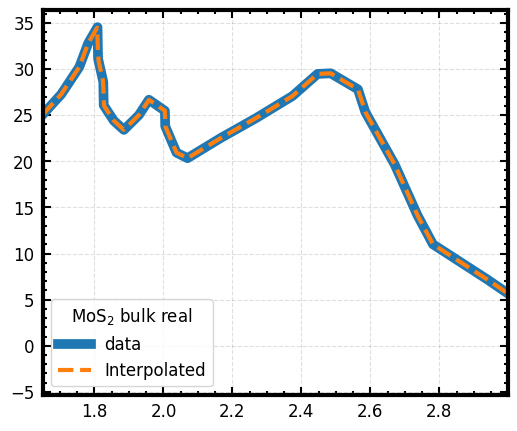

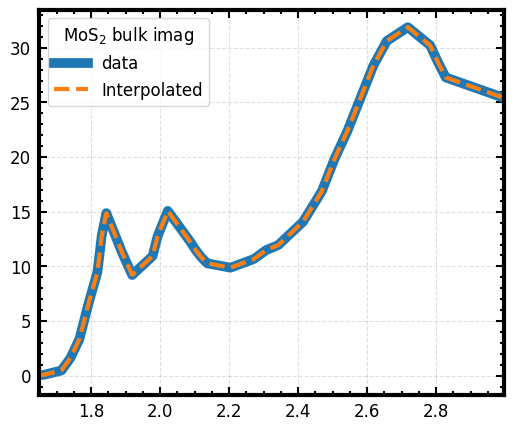

In [ ]:

plt.plot(MoS2_bulk_real_energy , MoS2_bulk_real_array, linewidth = '7' ,label = 'data')
plt.plot(energy_array, MoS2_bulk_eps_real_interpolated , '--', label = 'Interpolated')
plt.xlim(energy_array.min(), energy_array.max())
plt.legend(title = 'MoS$_2$ bulk real'); plt.show()

plt.plot(MoS2_bulk_imag_energy , MoS2_bulk_imag_array, linewidth = '7' ,label = 'data')
plt.plot(energy_array, MoS2_bulk_eps_imag_interpolated , '--', label = 'Interpolated')
plt.xlim(energy_array.min(), energy_array.max())
plt.legend(title = 'MoS$_2$ bulk imag'); plt.show()

In [ ]:

inplane_imag_MoS2_bulk_interpolator = interp1d( bdata_MoS2[1], bdata_MoS2[3], kind =3)
inplane_imag_MoS2_bulk_interpolated = inplane_imag_MoS2_bulk_interpolator(energy_array)

inplane_imag_MoS2_bulk_interpolator = interp1d(  bdata_MoS2[1], bdata_MoS2[3], kind =3)

bdata_MoS2_energy_interpolated = np.arange(1, 30, bdata_energy_delta )

inplane_imag_MoS2_bulk_interpolated = inplane_imag_MoS2_bulk_interpolator(bdata_MoS2_energy_interpolated)

bdata_MoS2_interpolated_by_energy_delta = pd.DataFrame({1: bdata_MoS2_energy_interpolated, 2: energy_delta, 3:inplane_imag_MoS2_bulk_interpolated })


In [ ]:
refl_contrast_MoS2_2L_interpolator = interp1d( refl_MoS2_2L['eV'], refl_MoS2_2L['reflectance contrast'], kind =1)


refl_MoS2_2L_interpolated = (refl_contrast_MoS2_2L_interpolator(energy_array) + 1)*R_substrate_array

refl_MoS2_2L_interpolator_fine = interp1d( energy_array, refl_MoS2_2L_interpolated, kind =1)
refl_MoS2_2L_interpolated_fine = refl_MoS2_2L_interpolator_fine(energy_array_fine)


refl_contrast_MoS2_3L_interpolator = interp1d( refl_MoS2_3L['eV'], refl_MoS2_3L['reflectance contrast'], kind =1)
refl_MoS2_3L_interpolated = (refl_contrast_MoS2_3L_interpolator(energy_array) + 1)*R_substrate_array

refl_MoS2_3L_interpolator_fine = interp1d( energy_array, refl_MoS2_3L_interpolated, kind =1)
refl_MoS2_3L_interpolated_fine = refl_MoS2_3L_interpolator_fine(energy_array_fine)


refl_contrast_MoS2_4L_interpolator = interp1d( refl_MoS2_4L['eV'], refl_MoS2_4L['reflectance contrast'], kind =1)
refl_MoS2_4L_interpolated = (refl_contrast_MoS2_4L_interpolator(energy_array) + 1)*R_substrate_array

refl_MoS2_4L_interpolator_fine = interp1d( energy_array, refl_MoS2_4L_interpolated, kind =1)
refl_MoS2_4L_interpolated_fine = refl_MoS2_4L_interpolator_fine(energy_array_fine)


refl_contrast_MoS2_5L_interpolator = interp1d( refl_MoS2_5L['eV'], refl_MoS2_5L['reflectance contrast'], kind =1)
refl_MoS2_5L_interpolated = (refl_contrast_MoS2_5L_interpolator(energy_array) + 1)*R_substrate_array

refl_MoS2_5L_interpolator_fine = interp1d( energy_array, refl_MoS2_5L_interpolated, kind =1)
refl_MoS2_5L_interpolated_fine = refl_MoS2_5L_interpolator_fine(energy_array_fine)



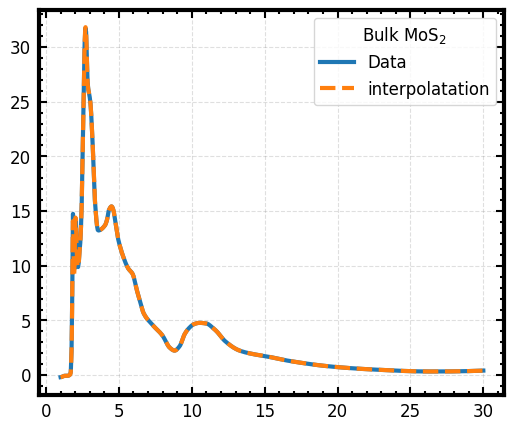

In [ ]:
plt.plot(bdata_MoS2[1], bdata_MoS2[3], label = 'Data')
plt.plot(bdata_MoS2_interpolated_by_energy_delta[1], bdata_MoS2_interpolated_by_energy_delta[3], '--', label = 'interpolatation')

plt.legend(title = 'Bulk MoS$_2$')
plt.show()

bdata_MoS2_interpolated_by_energy_delta = bdata_MoS2_interpolated_by_energy_delta.head(len_energy_array )



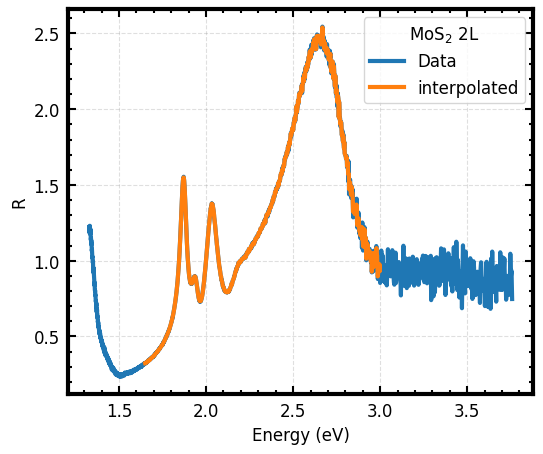

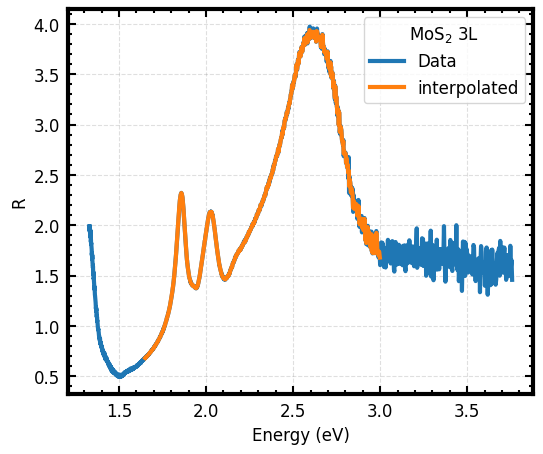

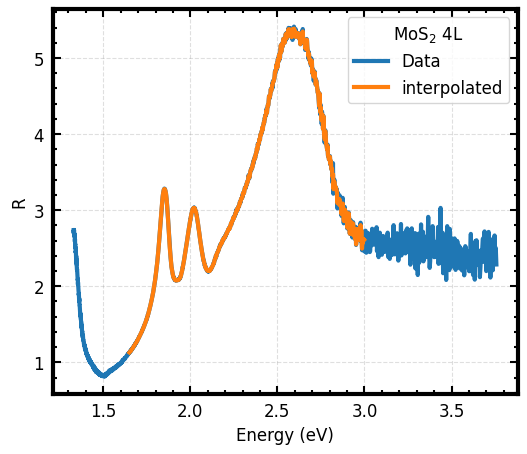

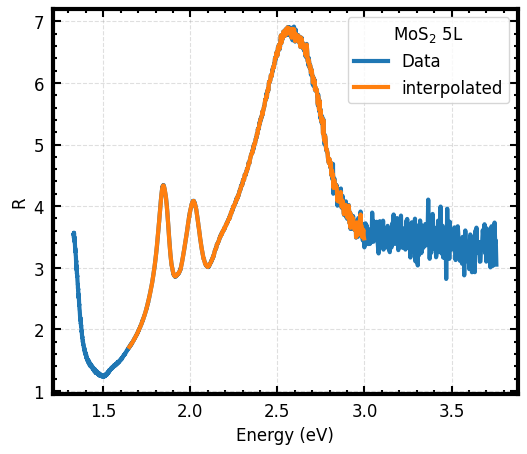

In [ ]:
plt.plot( refl_MoS2_2L['eV'], refl_MoS2_2L['reflectance contrast'], label = 'Data')
plt.plot( energy_array, refl_contrast_MoS2_2L_interpolator(energy_array), label = 'interpolated')

plt.xlabel(energy_text);plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 2L');
plt.show()

plt.plot( refl_MoS2_3L['eV'], refl_MoS2_3L['reflectance contrast'], label = 'Data')
plt.plot( energy_array, refl_contrast_MoS2_3L_interpolator(energy_array), label = 'interpolated')

plt.xlabel(energy_text);plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 3L');
plt.show()

plt.plot( refl_MoS2_4L['eV'], refl_MoS2_4L['reflectance contrast'], label = 'Data')
plt.plot( energy_array, refl_contrast_MoS2_4L_interpolator(energy_array), label = 'interpolated')

plt.xlabel(energy_text);plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 4L');
plt.show()

plt.plot( refl_MoS2_5L['eV'], refl_MoS2_5L['reflectance contrast'], label = 'Data')
plt.plot( energy_array, refl_contrast_MoS2_5L_interpolator(energy_array), label = 'interpolated')

plt.xlabel(energy_text);plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 5L');
plt.show()



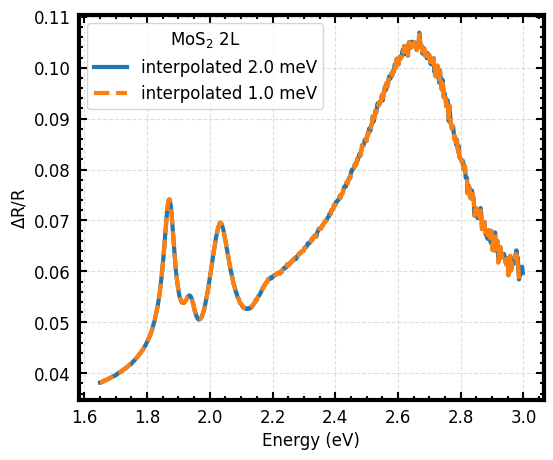

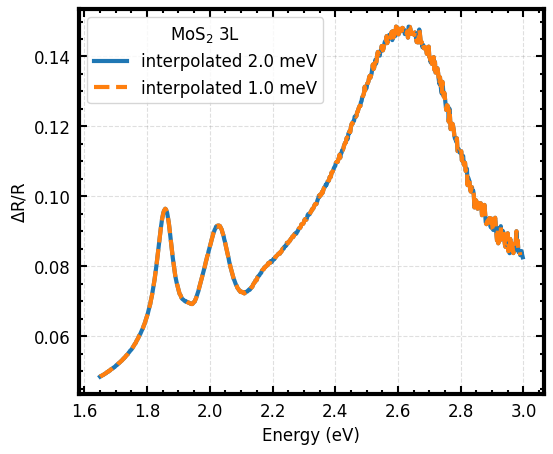

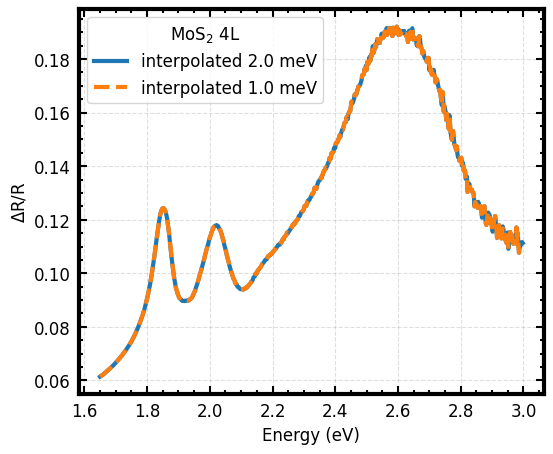

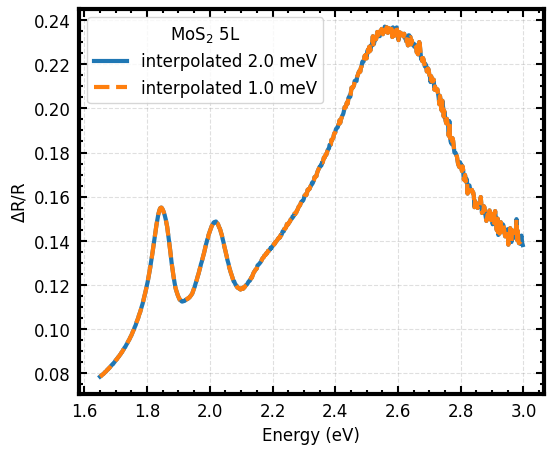

In [ ]:
plt.plot( energy_array, refl_MoS2_2L_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.plot(energy_array_fine, refl_MoS2_2L_interpolated_fine, '--' , label = 'interpolated %s meV' %str(energy_delta_fine*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('$\Delta$R/R');
plt.legend(title = 'MoS$_2$ 2L'); plt.show()

plt.plot( energy_array, refl_MoS2_3L_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.plot(energy_array_fine, refl_MoS2_3L_interpolated_fine, '--' , label = 'interpolated %s meV' %str(energy_delta_fine*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('$\Delta$R/R');
plt.legend(title = 'MoS$_2$ 3L'); plt.show()

plt.plot( energy_array, refl_MoS2_4L_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.plot(energy_array_fine, refl_MoS2_4L_interpolated_fine, '--' , label = 'interpolated %s meV' %str(energy_delta_fine*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('$\Delta$R/R');
plt.legend(title = 'MoS$_2$ 4L'); plt.show()

plt.plot( energy_array, refl_MoS2_5L_interpolated,  label = 'interpolated %s meV' %str(energy_delta*1000))
plt.plot(energy_array_fine, refl_MoS2_5L_interpolated_fine, '--' , label = 'interpolated %s meV' %str(energy_delta_fine*1000))
plt.xlabel('Energy (eV)'); plt.ylabel('$\Delta$R/R');
plt.legend(title = 'MoS$_2$ 5L'); plt.show()




## 2L

### Initial Guess from bulk

In [ ]:
MoS2_2L_eps1_from_bulk, MoS2_2L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_MoS2, bdata = bdata_MoS2)

In [ ]:

initial_lorentzian_guess_MoS2_2L = refl_MoS2_2L_interpolated*200

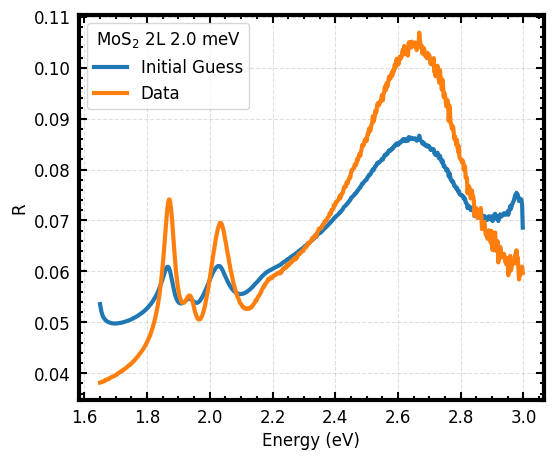

In [ ]:
guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_MoS2_2L , t= t_1L_MoS2*2,  n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =MoS2_2L_eps1_from_bulk, eps2_from_bulk=  MoS2_2L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_MoS2_2L_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 2L %s meV' %str(energy_delta*1000))
plt.show()

### Reflection Fit

In [ ]:
MoS2_2L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_MoS2*2, eps1_from_bulk = MoS2_2L_eps1_from_bulk, eps2_from_bulk = MoS2_2L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_MoS2_2L_interpolated, p0 = initial_lorentzian_guess_MoS2_2L, bounds = (0, 100))

MoS2_2L_reflection_with_n_fit = fit_mult_osc(energy_array, *MoS2_2L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = MoS2_2L_eps1_from_bulk, eps2_from_bulk =  MoS2_2L_eps2_from_bulk, t = t_1L_MoS2*2)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


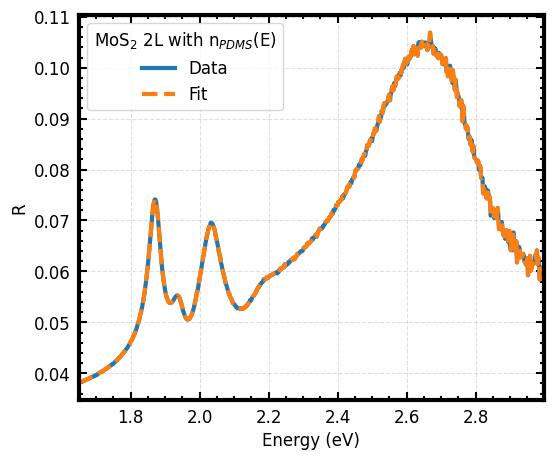

In [ ]:
plt.plot(energy_array, refl_MoS2_2L_interpolated, label = 'Data')
plt.plot(energy_array, MoS2_2L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 2L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_MoS2_2L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric Functions

In [ ]:
MoS2_2L_inplane_real, MoS2_2L_inplane_imag  = dielectric_functions(energy_array, MoS2_2L_reflection_with_n_popt,
  gamma = gamma,eps1_from_bulk = MoS2_2L_eps1_from_bulk, eps2_from_bulk = MoS2_2L_eps2_from_bulk)


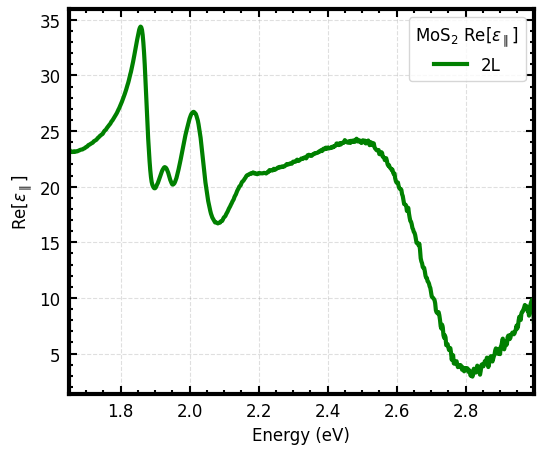

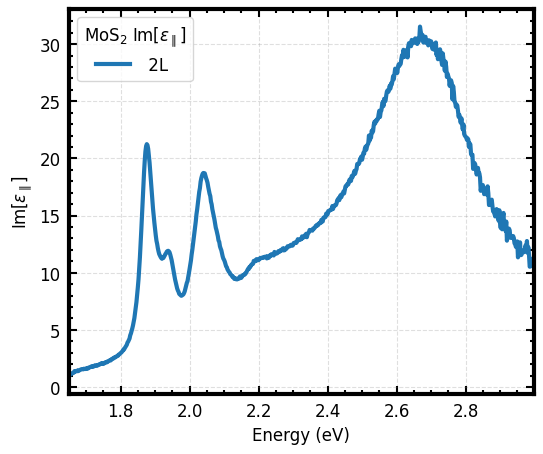

In [ ]:
plt.plot(energy_array, MoS2_2L_inplane_real, 'g', label = '2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_2L_inplane_imag, label = ' 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_2L.png", bbox_inches='tight')
plt.show()
plt.close()

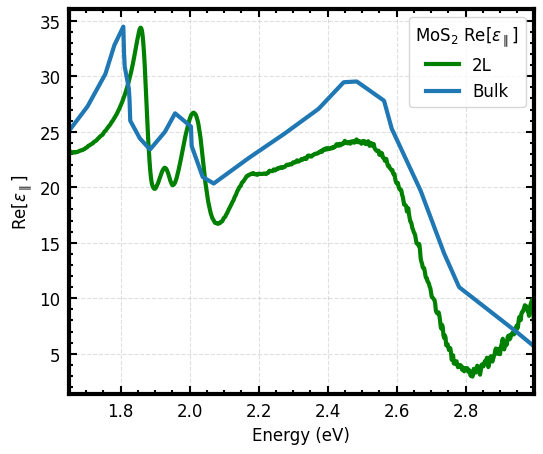

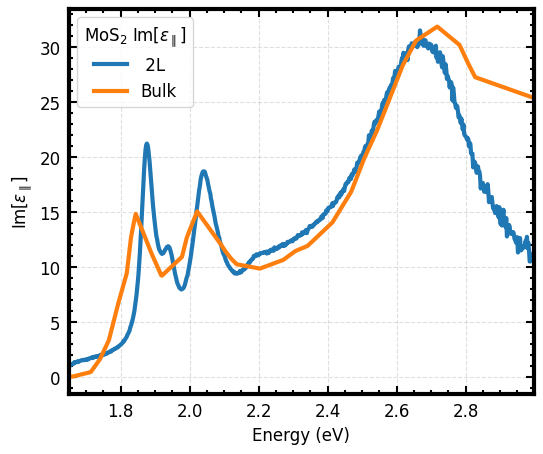

In [ ]:
plt.plot(energy_array, MoS2_2L_inplane_real, 'g', label = '2L')
plt.plot(energy_array,  MoS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_2L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_2L_inplane_imag, label = ' 2L ')
plt.plot(energy_array,  MoS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_2L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## 3L

### Initial Guess From Bulk

In [ ]:
MoS2_3L_eps1_from_bulk, MoS2_3L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_MoS2, bdata = bdata_MoS2)

In [ ]:

initial_lorentzian_guess_MoS2_3L = refl_MoS2_3L_interpolated*180

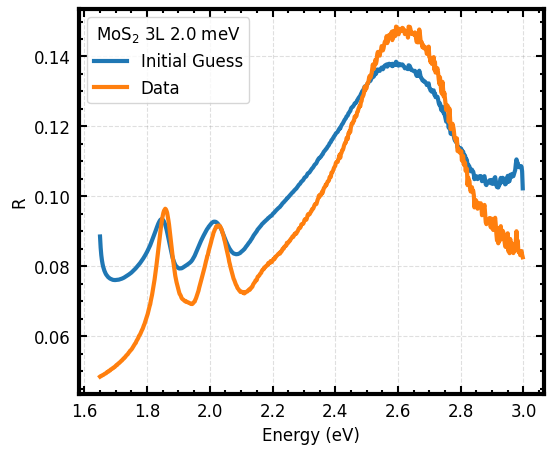

In [ ]:
guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_MoS2_3L , t= t_1L_MoS2*3,  n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =MoS2_3L_eps1_from_bulk, eps2_from_bulk=  MoS2_3L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_MoS2_3L_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 3L %s meV' %str(energy_delta*1000))
plt.show()

### Reflection Fit

In [ ]:
MoS2_3L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_MoS2*3, eps1_from_bulk = MoS2_3L_eps1_from_bulk, eps2_from_bulk = MoS2_3L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_MoS2_3L_interpolated, p0 = initial_lorentzian_guess_MoS2_3L, bounds = (0, 100))

MoS2_3L_reflection_with_n_fit = fit_mult_osc(energy_array, *MoS2_3L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = MoS2_3L_eps1_from_bulk, eps2_from_bulk =  MoS2_3L_eps2_from_bulk, t = t_1L_MoS2*3)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


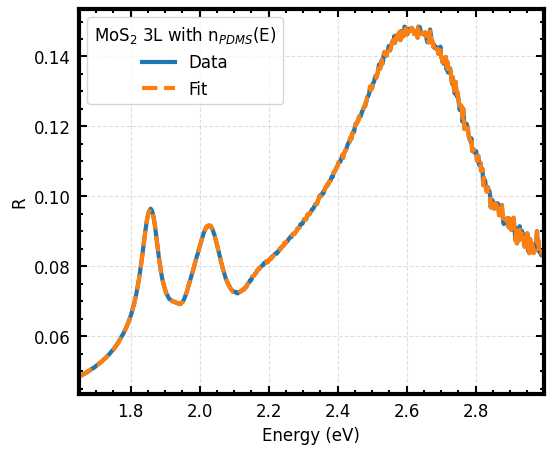

In [ ]:
plt.plot(energy_array, refl_MoS2_3L_interpolated, label = 'Data')
plt.plot(energy_array, MoS2_3L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 3L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_MoS2_3L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric Functions

In [ ]:
MoS2_3L_inplane_real, MoS2_3L_inplane_imag  = dielectric_functions(energy_array, MoS2_3L_reflection_with_n_popt,
  gamma = gamma,eps1_from_bulk = MoS2_3L_eps1_from_bulk, eps2_from_bulk = MoS2_3L_eps2_from_bulk)


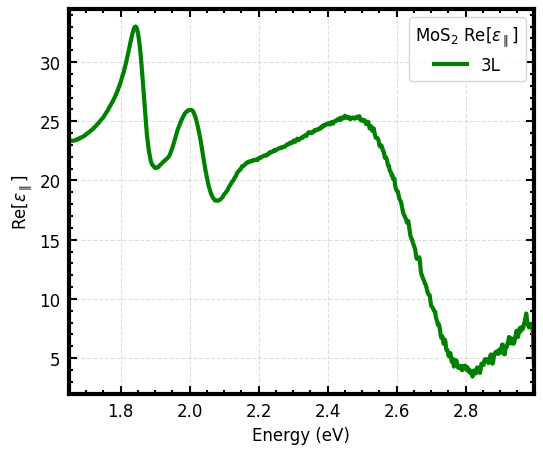

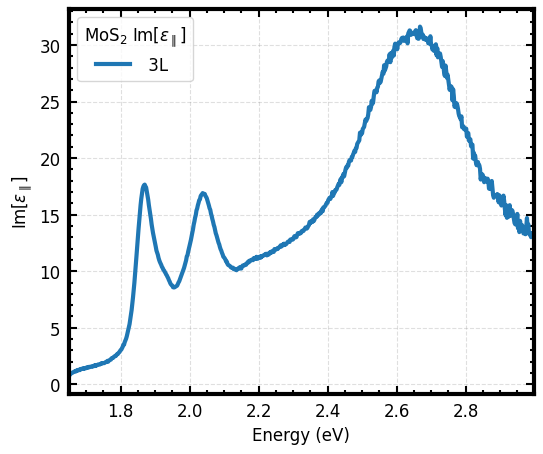

In [ ]:
plt.plot(energy_array, MoS2_3L_inplane_real, 'g', label = '3L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_3L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_3L_inplane_imag, label = ' 3L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_3L.png", bbox_inches='tight')
plt.show()
plt.close()

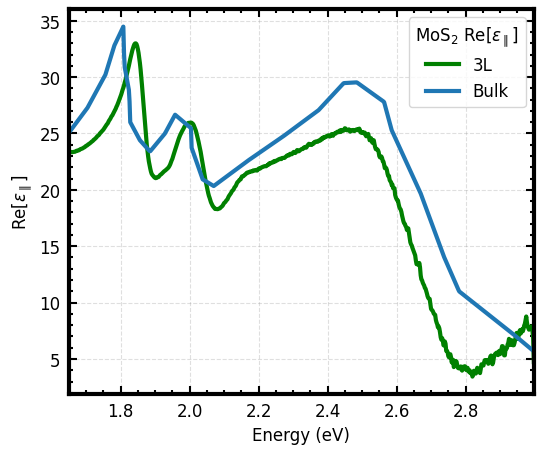

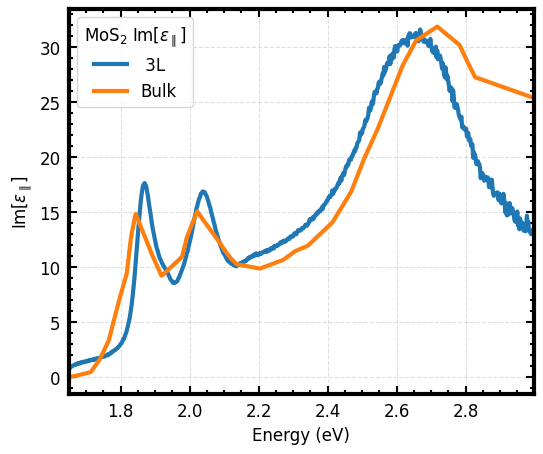

In [ ]:
plt.plot(energy_array, MoS2_3L_inplane_real, 'g', label = '3L')
plt.plot(energy_array,  MoS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_3L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_3L_inplane_imag, label = ' 3L ')
plt.plot(energy_array,  MoS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_3L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## 4L

### Initial Guess From Bulk

In [ ]:
MoS2_4L_eps1_from_bulk, MoS2_4L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_MoS2, bdata = bdata_MoS2)

In [ ]:
initial_lorentzian_guess_MoS2_4L = refl_MoS2_4L_interpolated*180 -8


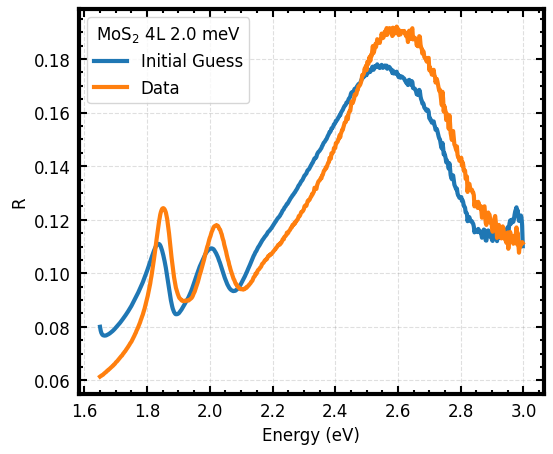

In [ ]:
guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_MoS2_4L , t= t_1L_MoS2*4,  n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =MoS2_4L_eps1_from_bulk, eps2_from_bulk=  MoS2_4L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_MoS2_4L_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 4L %s meV' %str(energy_delta*1000))
plt.show()

### Reflection Fit

In [ ]:
MoS2_4L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_MoS2*4, eps1_from_bulk = MoS2_4L_eps1_from_bulk, eps2_from_bulk = MoS2_4L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_MoS2_4L_interpolated, p0 = initial_lorentzian_guess_MoS2_4L, bounds = (0, 100))

MoS2_4L_reflection_with_n_fit = fit_mult_osc(energy_array, *MoS2_4L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = MoS2_4L_eps1_from_bulk, eps2_from_bulk =  MoS2_4L_eps2_from_bulk, t = t_1L_MoS2*4)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


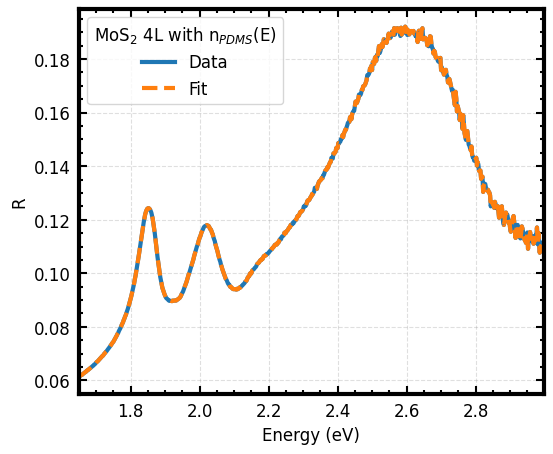

In [ ]:
plt.plot(energy_array, refl_MoS2_4L_interpolated, label = 'Data')
plt.plot(energy_array, MoS2_4L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 4L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_MoS2_4L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric Functions

In [ ]:
MoS2_4L_inplane_real, MoS2_4L_inplane_imag  = dielectric_functions(energy_array, MoS2_4L_reflection_with_n_popt,
  gamma = gamma,eps1_from_bulk = MoS2_4L_eps1_from_bulk, eps2_from_bulk = MoS2_4L_eps2_from_bulk)


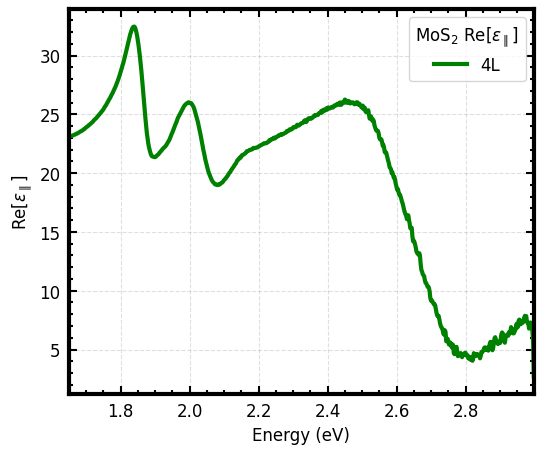

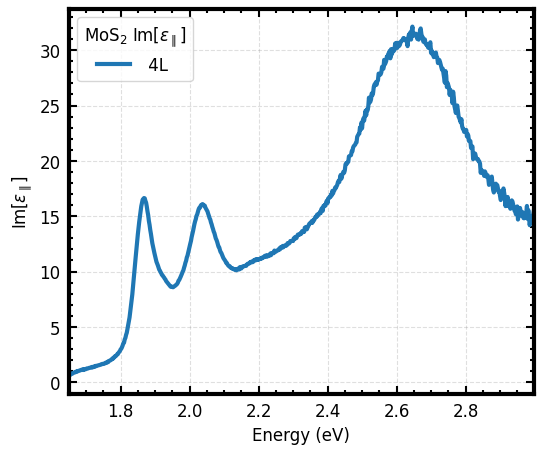

In [ ]:
plt.plot(energy_array, MoS2_4L_inplane_real, 'g', label = '4L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_4L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_4L_inplane_imag, label = ' 4L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_4L.png", bbox_inches='tight')
plt.show()
plt.close()

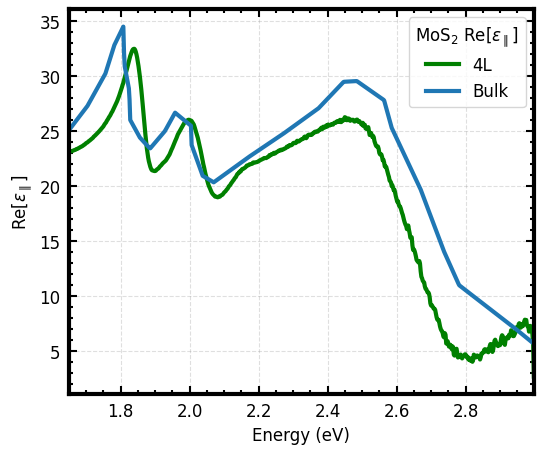

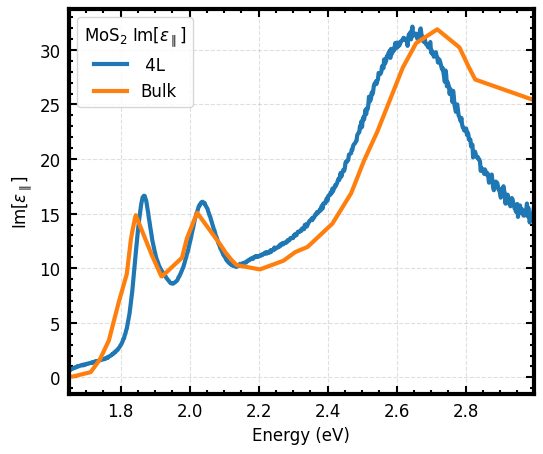

In [ ]:
plt.plot(energy_array, MoS2_4L_inplane_real, 'g', label = '4L')
plt.plot(energy_array,  MoS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_4L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_4L_inplane_imag, label = ' 4L ')
plt.plot(energy_array,  MoS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_4L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## 5L

### Initial Guess From Bulk

In [ ]:
MoS2_5L_eps1_from_bulk, MoS2_5L_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_MoS2, bdata = bdata_MoS2)

In [ ]:

initial_lorentzian_guess_MoS2_5L = refl_MoS2_5L_interpolated*180-12

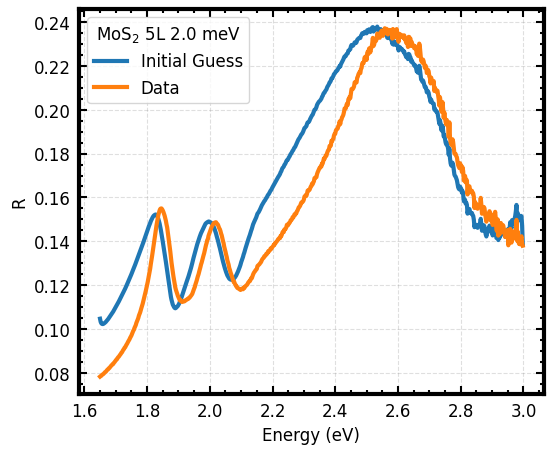

In [ ]:
guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_MoS2_5L , t= t_1L_MoS2*5,  n_substrate = n_substrate_array, gamma = gamma, eps1_from_bulk =MoS2_5L_eps1_from_bulk, eps2_from_bulk=  MoS2_5L_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_MoS2_5L_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 5L %s meV' %str(energy_delta*1000))
plt.show()

### Reflection Fit

In [ ]:
MoS2_5L_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate = n_substrate_array, gamma = gamma, t = t_1L_MoS2*5, eps1_from_bulk = MoS2_5L_eps1_from_bulk, eps2_from_bulk = MoS2_5L_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_MoS2_5L_interpolated, p0 = initial_lorentzian_guess_MoS2_5L, bounds = (0, 100))

MoS2_5L_reflection_with_n_fit = fit_mult_osc(energy_array, *MoS2_5L_reflection_with_n_popt, n_substrate= n_substrate_array, gamma = gamma, eps1_from_bulk = MoS2_5L_eps1_from_bulk, eps2_from_bulk =  MoS2_5L_eps2_from_bulk, t = t_1L_MoS2*5)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


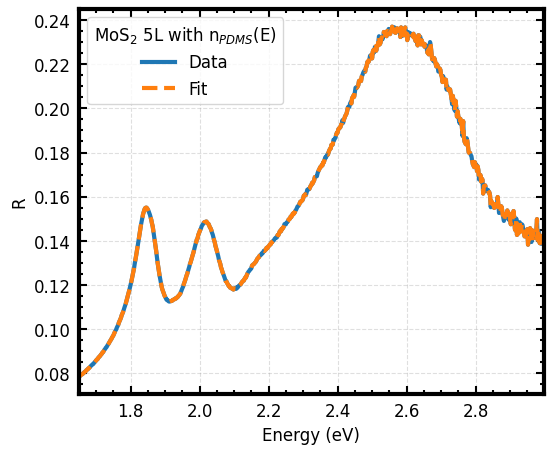

In [ ]:
plt.plot(energy_array, refl_MoS2_5L_interpolated, label = 'Data')
plt.plot(energy_array, MoS2_5L_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 5L with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_MoS2_5L_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric Functions

In [ ]:
MoS2_5L_inplane_real, MoS2_5L_inplane_imag  = dielectric_functions(energy_array, MoS2_5L_reflection_with_n_popt,
  gamma = gamma,eps1_from_bulk = MoS2_5L_eps1_from_bulk, eps2_from_bulk = MoS2_5L_eps2_from_bulk)


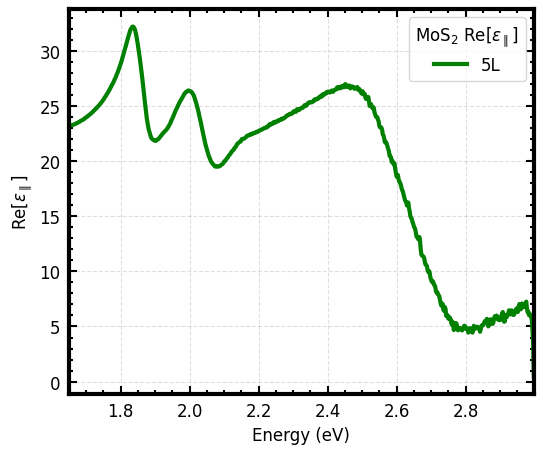

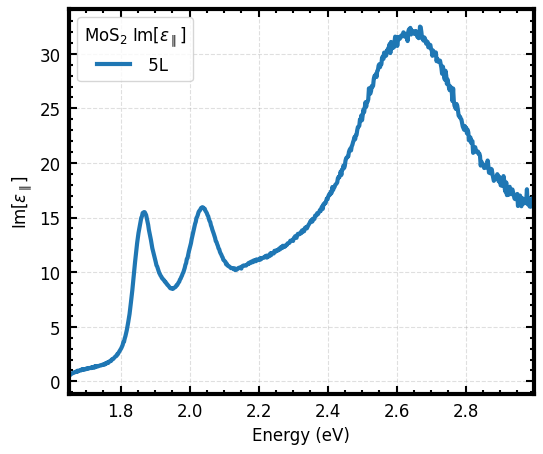

In [ ]:
plt.plot(energy_array, MoS2_5L_inplane_real, 'g', label = '5L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_5L.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_5L_inplane_imag, label = ' 5L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_5L.png", bbox_inches='tight')
plt.show()
plt.close()

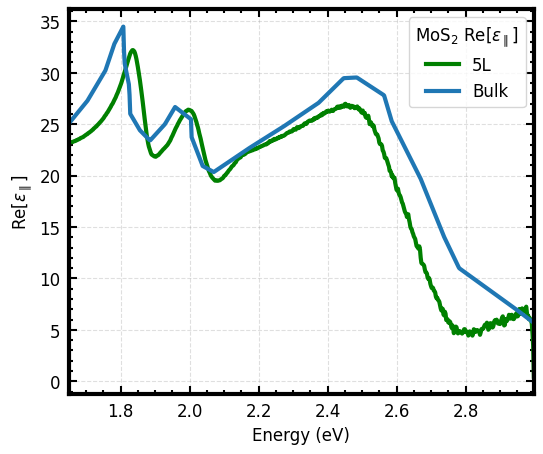

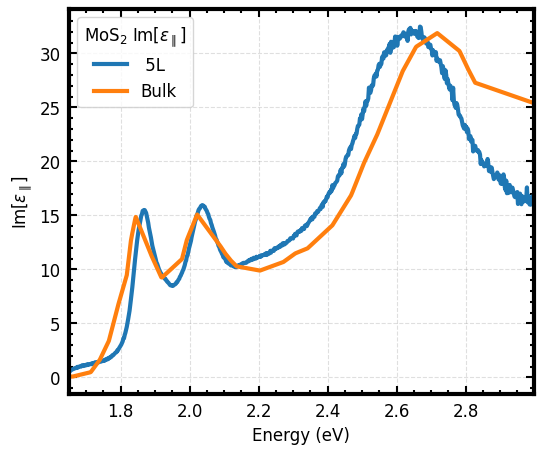

In [ ]:
plt.plot(energy_array, MoS2_5L_inplane_real, 'g', label = '5L')
plt.plot(energy_array,  MoS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_5L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_5L_inplane_imag, label = ' 5L ')
plt.plot(energy_array,  MoS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_5L_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## MoS$_2$ All layers $\epsilon_{\parallel}$ combined

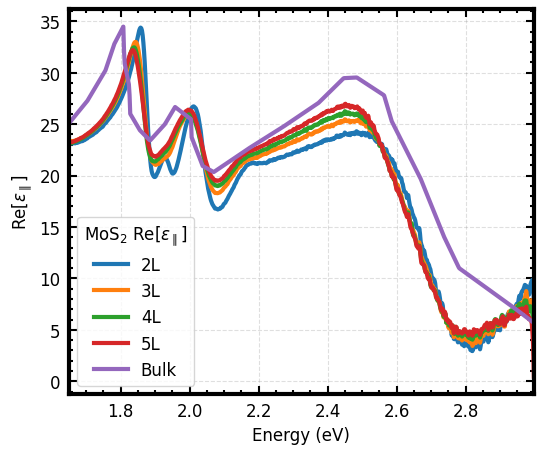

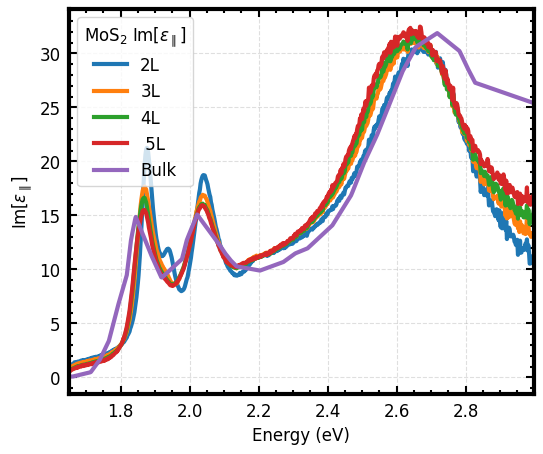

In [ ]:
plt.plot(energy_array, MoS2_2L_inplane_real,  label = '2L')
plt.plot(energy_array, MoS2_3L_inplane_real,  label = '3L')
plt.plot(energy_array, MoS2_4L_inplane_real,  label = '4L')
plt.plot(energy_array, MoS2_5L_inplane_real,  label = '5L')
plt.plot(energy_array,  MoS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_2L_inplane_imag,  label = '2L')
plt.plot(energy_array, MoS2_3L_inplane_imag,  label = '3L')
plt.plot(energy_array, MoS2_4L_inplane_imag, label = '4L')
plt.plot(energy_array, MoS2_5L_inplane_imag, label = ' 5L ')
plt.plot(energy_array,  MoS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2.png", bbox_inches='tight')
plt.show()
plt.close()

# MoS$_2$ SUSPENDED

## Substrate picking and interpolations

In [ ]:

refl_contrast_MoS2_2L_suspended_interpolator = interp1d( MoS2_2L_suspended_energy, MoS2_2L_suspended_refl_cont)

refl_MoS2_2L_suspended_interpolated = refl_contrast_MoS2_2L_suspended_interpolator(energy_array)*quartz_reflectance_array

n_substrate_name = 'n$_{Quartz}$'

In [ ]:
MoS2_bulk_real_energy = np.array(list(map(log_to_energy, MoS2_bulk_real_log_energy_array)) )
MoS2_bulk_imag_energy = np.array(list(map(log_to_energy, MoS2_bulk_imag_log_energy_array)) )

MoS2_bulk_eps_real_interpolator = interp1d(MoS2_bulk_real_energy , MoS2_bulk_real_array, kind = 1)
MoS2_bulk_eps_real_interpolated = MoS2_bulk_eps_real_interpolator(energy_array)


MoS2_bulk_eps_imag_interpolator = interp1d(MoS2_bulk_imag_energy , MoS2_bulk_imag_array, kind = 1)
MoS2_bulk_eps_imag_interpolated = MoS2_bulk_eps_imag_interpolator(energy_array)


In [ ]:

inplane_imag_MoS2_bulk_interpolator = interp1d( bdata_MoS2[1], bdata_MoS2[3], kind =3)
inplane_imag_MoS2_bulk_interpolated = inplane_imag_MoS2_bulk_interpolator(energy_array)

inplane_imag_MoS2_bulk_interpolator = interp1d(  bdata_MoS2[1], bdata_MoS2[3], kind =3)

bdata_MoS2_energy_interpolated = np.arange(1, 30, bdata_energy_delta )

inplane_imag_MoS2_bulk_interpolated = inplane_imag_MoS2_bulk_interpolator(bdata_MoS2_energy_interpolated)

bdata_MoS2_interpolated_by_energy_delta = pd.DataFrame({1: bdata_MoS2_energy_interpolated, 2: energy_delta, 3:inplane_imag_MoS2_bulk_interpolated })
bdata_MoS2_interpolated_by_energy_delta = bdata_MoS2_interpolated_by_energy_delta.head(len_energy_array )


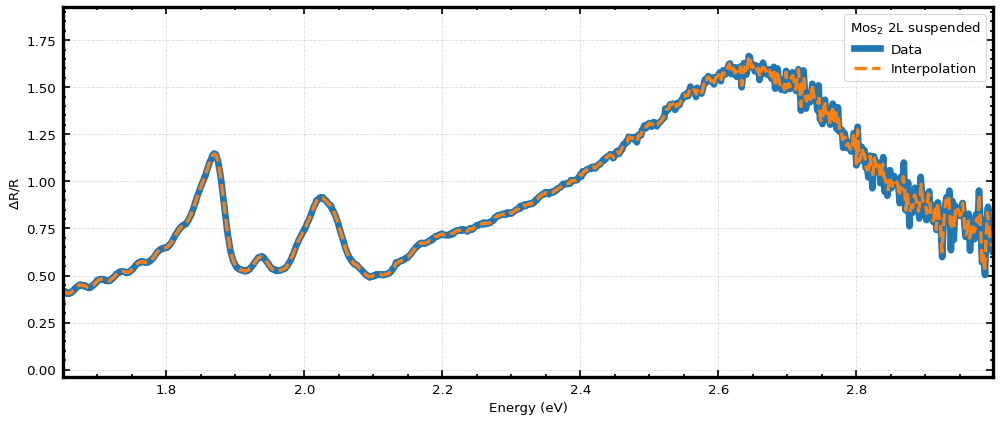

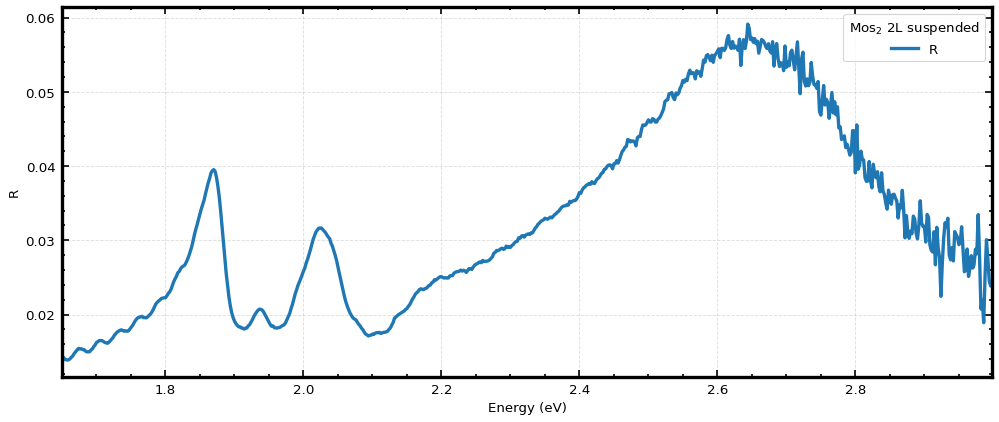

In [ ]:
figure(figsize=(15, 6), dpi=80)

plt.plot(MoS2_2L_suspended_energy, MoS2_2L_suspended_refl_cont, linewidth = 6, label = 'Data')
plt.plot(energy_array, refl_contrast_MoS2_2L_suspended_interpolator(energy_array), '--',label = 'Interpolation')
plt.legend(title = 'Mos$_2$ 2L suspended'); plt.xlim(min(energy_array), max(energy_array))
plt.xlabel('Energy (eV)'); plt.ylabel(reflectance_contrast_text)
plt.show()

figure(figsize=(15, 6), dpi=80)

plt.plot(energy_array, refl_MoS2_2L_suspended_interpolated, label = 'R')
plt.legend(title = 'Mos$_2$ 2L suspended'); plt.xlim(min(energy_array), max(energy_array))
plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.show()



## 2L

### Initial Guess from bulk

In [ ]:
MoS2_2L_suspended_eps1_from_bulk, MoS2_2L_suspended_eps2_from_bulk = fit_from_bulk_part(energy_array, bstart = bstart_MoS2, bdata = bdata_MoS2)

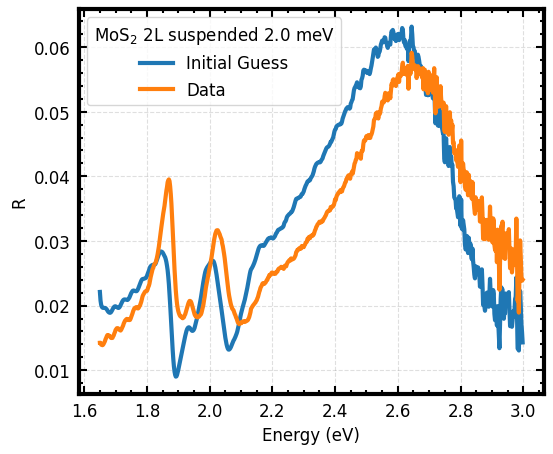

In [ ]:

initial_lorentzian_guess_MoS2_2L_suspended = refl_MoS2_2L_suspended_interpolated*700 -6

guess_data = fit_mult_osc(energy_array, *initial_lorentzian_guess_MoS2_2L_suspended , t= t_1L_MoS2*2,  n_substrate = 1, gamma = gamma, eps1_from_bulk =MoS2_2L_suspended_eps1_from_bulk, eps2_from_bulk=  MoS2_2L_suspended_eps2_from_bulk )

plt.plot(energy_array, guess_data, label = 'Initial Guess')

plt.plot(energy_array, refl_MoS2_2L_suspended_interpolated, label = 'Data')
plt.xlabel(energy_text); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 2L suspended %s meV' %str(energy_delta*1000))
plt.show()

### Reflection Fit

In [ ]:
MoS2_2L_suspended_reflection_with_n_popt, pcov= curve_fit(lambda energy_array, *x : fit_mult_osc(energy_array, *x, n_substrate =np.ones(len_energy_array), gamma = gamma, t = t_1L_MoS2*2, eps1_from_bulk = MoS2_2L_suspended_eps1_from_bulk, eps2_from_bulk = MoS2_2L_suspended_eps2_from_bulk) ,
                      xdata = energy_array, ydata = refl_MoS2_2L_suspended_interpolated, p0 = initial_lorentzian_guess_MoS2_2L_suspended, bounds = (0, 100))

MoS2_2L_suspended_reflection_with_n_fit = fit_mult_osc(energy_array, *MoS2_2L_suspended_reflection_with_n_popt, n_substrate= 1, gamma = gamma, eps1_from_bulk = MoS2_2L_suspended_eps1_from_bulk, eps2_from_bulk =  MoS2_2L_suspended_eps2_from_bulk, t = t_1L_MoS2*2)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


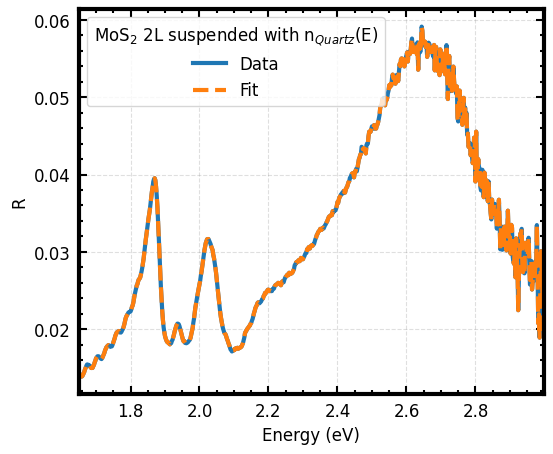

In [ ]:
plt.plot(energy_array, refl_MoS2_2L_suspended_interpolated, label = 'Data')
plt.plot(energy_array, MoS2_2L_suspended_reflection_with_n_fit , '--', label = 'Fit' )
plt.xlim(energy_array.min(), energy_array.max())

plt.xlabel('Energy (eV)'); plt.ylabel('R')
plt.legend(title = 'MoS$_2$ 2L suspended with %s(E)' %n_substrate_name)

plt.savefig(output_folder_path + "/reflection_fit_for_MoS2_2L_suspended_with_n.png", bbox_inches='tight')
plt.show()
plt.close()

### Dielectric functions

In [ ]:
MoS2_2L_suspended_inplane_real, MoS2_2L_suspended_inplane_imag  = dielectric_functions(energy_array, MoS2_2L_suspended_reflection_with_n_popt,
  gamma = gamma, eps1_from_bulk = MoS2_2L_suspended_eps1_from_bulk, eps2_from_bulk = MoS2_2L_suspended_eps2_from_bulk)


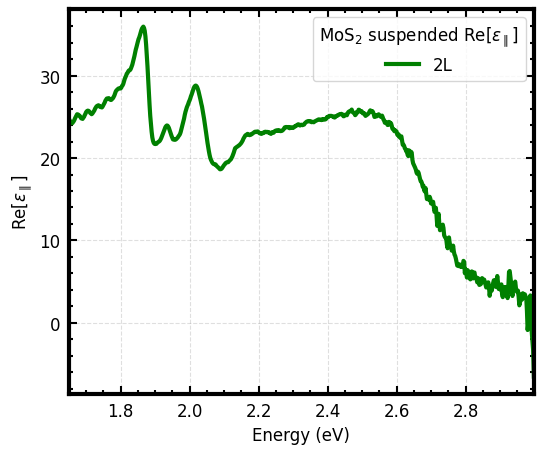

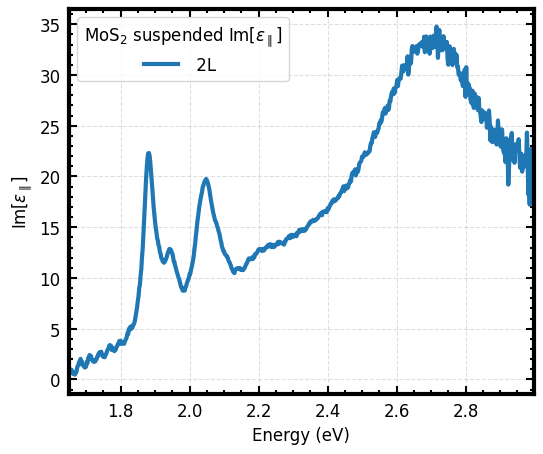

In [ ]:
plt.plot(energy_array, MoS2_2L_suspended_inplane_real, 'g', label = '2L')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ suspended Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_2L_suspended.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_2L_suspended_inplane_imag, label = ' 2L ')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ suspended Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_2L_suspended.png", bbox_inches='tight')
plt.show()
plt.close()

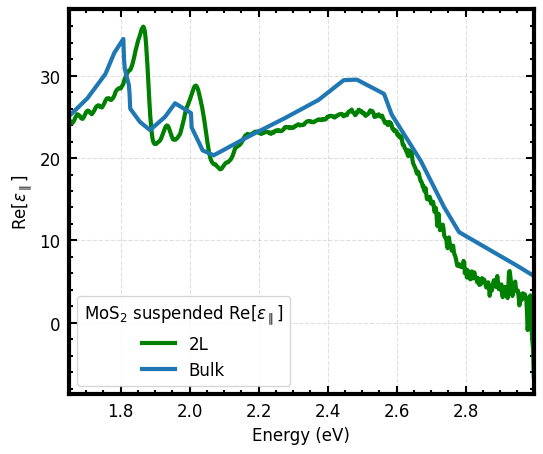

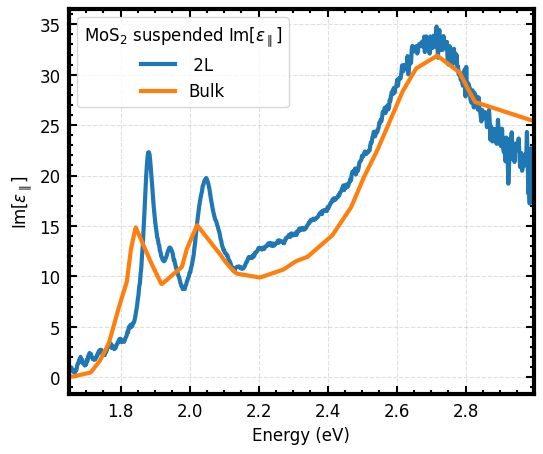

In [ ]:
plt.plot(energy_array, MoS2_2L_suspended_inplane_real, 'g', label = '2L')
plt.plot(energy_array,  MoS2_bulk_eps_real_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ suspended Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_2L_suspended_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_2L_suspended_inplane_imag, label = ' 2L ')
plt.plot(energy_array,  MoS2_bulk_eps_imag_interpolated, label = 'Bulk')
plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ suspended Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_2L_suspended_with_bulk.png", bbox_inches='tight')
plt.show()
plt.close()

## On substrate vs suspended

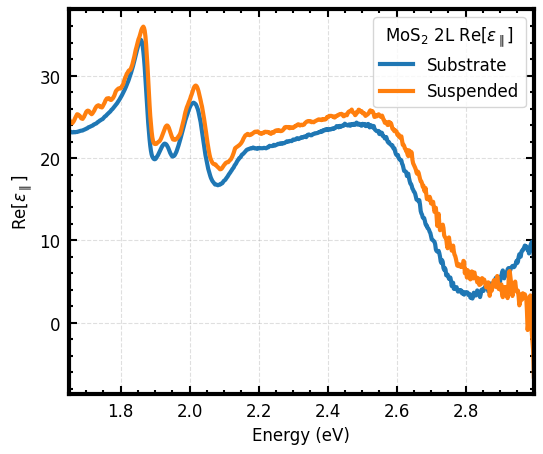

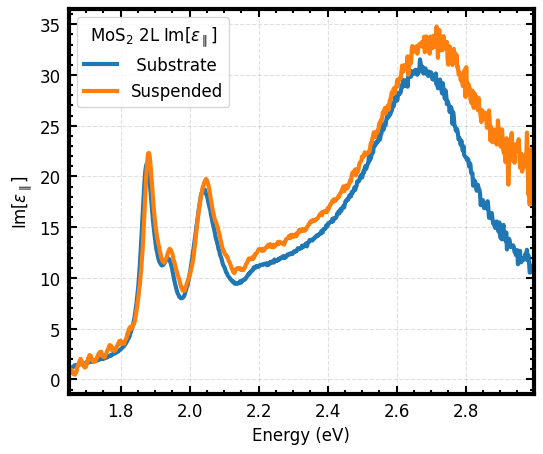

In [ ]:
plt.plot(energy_array, MoS2_2L_inplane_real, label = 'Substrate')
plt.plot(energy_array, MoS2_2L_suspended_inplane_real, label = 'Suspended')

plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Re[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ 2L Re[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_real_for_MoS2_2L_substrate_vs_suspended.png", bbox_inches='tight')
plt.show()
plt.close()

plt.plot(energy_array, MoS2_2L_inplane_imag, label = ' Substrate ')
plt.plot(energy_array, MoS2_2L_suspended_inplane_imag, label = 'Suspended')

plt.xlim(energy_array.min(), energy_array.max()); plt.xlabel('Energy (eV)'); plt.ylabel('Im[$\epsilon_{\parallel}$]')
plt.legend(title = 'MoS$_2$ 2L Im[$\epsilon_{\parallel}$]')

plt.savefig(output_folder_path + "/inplane_dielectric_imag_for_MoS2_2L_substrate_vs_suspended.png", bbox_inches='tight')
plt.show()
plt.close()